In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import math as m 
import pandas as pd
import decimal as d
import matplotlib.patches
import os
import networkx as nx
from matplotlib.patches import Circle

Short Edge Hat Model 
---

16 Helices per sub unit

In [2]:
#Generating intitial values

#change these depending on your parameters 
r=0.34 #rise (nm) per base pair 
D=2.7 #interhelical distance 
alpha=60 #angle end of base sub unit
h_min= 8 #shortest helix
H=16 #number of helices per subunit
pc=15 #phase Correction
dhtd=10.44 #doble-helical twist density (bp/turn)
ddh=2 #double helix diameter

#Helical extension 
E= D/(m.tan(m.radians(alpha/2)))

#additional base pairs per helix
n_bp=D/(r*m.tan(m.radians(alpha/2)))

#number of base pairs in each string 
helices_lengths=[]
for j in range(1,H+1):
    if j<=H/2:
        length_helix= round(h_min+((j-1)*n_bp))
        helices_lengths.append(length_helix)
    if j>=H/2+1:
        length_helix= round(h_min+((H-j)*n_bp))
        helices_lengths.append(length_helix)

h_max=max(helices_lengths)#max helix length
gap= D/(m.tan(m.radians(alpha/2)))
h= ((h_max-1)*r)+gap 

print("Interhelical Distance, D=",D,"nm")
print("r=",r,"nm/bp")
print("Helices per Subunit=",H)
print("E=",E)
print('n_bp=',n_bp)
print("Length of Helices(bp)=",helices_lengths)
print("Min Helix length(bp)=",h_min)
print("Max Helix length(bp)=",h_max)
print("h(nm)=",h)

Interhelical Distance, D= 2.7 nm
r= 0.34 nm/bp
Helices per Subunit= 16
E= 4.67653718043597
n_bp= 13.754521118929324
Length of Helices(bp)= [8, 22, 36, 49, 63, 77, 91, 104, 104, 91, 77, 63, 49, 36, 22, 8]
Min Helix length(bp)= 8
Max Helix length(bp)= 104
h(nm)= 39.696537180435975


(-41.681364039457776,
 1.9848268590217988,
 -1.7189104820265524,
 36.0971201225576)

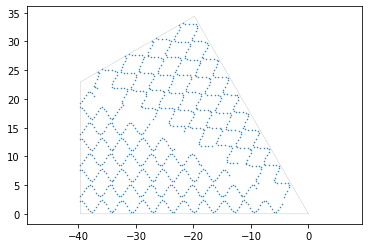

In [3]:
#Scaffold Strand Coordinates

#Coordinates of subunit in iscocelese triangle form
scaffold_coords_initial=[]
for n in range(0,len(helices_lengths)):
    j=n+1
    coords=[]
    
    for k in range(0,helices_lengths[n]):
        i=k+1
        
        x=-h+(0.34*(i-1))
        
        if j%2 ==1:
            a1=(D-2)/2
            b1=((H/2)-j)*D
            theta=((360*(i-1))/10.44)+15
            c1=(1-m.cos(m.radians(theta)))
            
            
            y=a1+b1+c1
            z=-(m.sin(m.radians(theta)))
        else:
            y=(-(D-ddh)/ddh)+((H/2)-j+1)*D -(1-m.cos(m.radians(((360*(i-1))/dhtd)-pc)))
            z=-m.sin(m.radians(((360*(i-1))/dhtd)-15))
        pos=(x,y,z)
        
        scaffold_coords_initial.append(pos)

#applying a transformation to create kite structure

scaffold_coords=[]
for i in range(0, len(scaffold_coords_initial)):
    if i<=int(len(scaffold_coords_initial)/2)-1:
        point=scaffold_coords_initial[i]
        x=point[0]
        y=point[1]
        z=point[2]
    else:
        point=scaffold_coords_initial[i]
        beta= 360-alpha
        x=(point[0]*m.cos(m.radians(beta)))-(point[1]*m.sin(m.radians(beta)))
        y=(point[0]*m.sin(m.radians(beta)))+(point[1]*m.cos(m.radians(beta)))
        z=point[2]
   
        
        #beta=m.degrees(m.atan(point[1]/point[0]))
        #theta=(180+beta)-(alpha)
        #rad=m.sqrt((point[0])**2+(point[1])**2)
        #x=rad*m.cos(m.radians(theta))
        #y=rad*m.sin(m.radians(theta))
        #z=point[2]
   
    pos=(x,y,z)
    
    scaffold_coords.append(pos)

x_scaf=[]
y_scaf=[]
z_scaf=[]
for i in range(0,len(scaffold_coords)):
    point=scaffold_coords[i]
    x=point[0]
    y=point[1]
    z=point[2]
    
    x_scaf.append(x)
    y_scaf.append(y)
    z_scaf.append(z)

#kite coords
kite_x=(0,-h,-h,-h*m.cos(m.radians(alpha)),0)
kite_y=(0,0,h*m.tan(m.radians(alpha/2)),h*m.sin(m.radians(alpha)),0)
        
#plotting 
plt.plot(x_scaf,y_scaf,".",markersize="1") 
plt.plot(kite_x,kite_y, color="grey", linewidth="0.2")
plt.axis("equal")

(-41.681364039457776,
 1.9848268590217988,
 -1.7189104820265524,
 36.0971201225576)

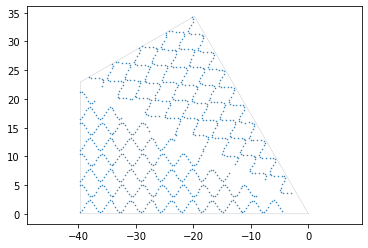

In [4]:
#Staple Strand Coordinates
staple_coords_initial=[]
for n in range(0,len(helices_lengths)):
    j=n+1
    coords=[]
    
    for k in range(0,helices_lengths[n]):
        i=k+1
        
        x=-h+(0.34*(i-1))
        
        if j%2 ==1:
            a1=(D-2)/2
            b1=((H/2)-j)*D
            theta=((360*(i-1))/10.44)+15 +150
            c1=(1-m.cos(m.radians(theta)))
            

            y=a1+b1+c1
            z=-(m.sin(m.radians(theta)))
        else:
            y=(-(D-2)/2)+((H/2)-j+1)*D -(1-m.cos(m.radians(((360*(i-1))/dhtd)-pc-150)))
            z=-m.sin(m.radians(((360*(i-1))/dhtd)-15-150))
        pos=(x,y,z)
        
        staple_coords_initial.append(pos)

#applying a transformation to create Kite 
staple_coords=[]
for i in range(0, len(staple_coords_initial)):
    if i<=int(len(staple_coords_initial)/2)-1:
        point=staple_coords_initial[i]
        x=point[0]
        y=point[1]
        z=point[2]
    else:
        point=staple_coords_initial[i]
        beta= 360-alpha
        x=(point[0]*m.cos(m.radians(beta)))-(point[1]*m.sin(m.radians(beta)))
        y=(point[0]*m.sin(m.radians(beta)))+(point[1]*m.cos(m.radians(beta)))
        z=point[2]
   
        #beta=m.degrees(m.atan(point[1]/point[0]))
        #theta=(180+beta)-(alpha)
        #rad=m.sqrt((point[0])**2+(point[1])**2)
        #x=rad*m.cos(m.radians(theta))
        #y=rad*m.sin(m.radians(theta))
        #z=point[2]
   
    pos=(x,y,z)
    
    staple_coords.append(pos)

x_stap=[]
y_stap=[]
z_stap=[]
for i in range(0,len(staple_coords)):
    point=staple_coords[i]
    x=point[0]
    y=point[1]
    z=point[2]
    
    x_stap.append(x)
    y_stap.append(y)
    z_stap.append(z)

#kite coords
kite_x=(0,-h,-h,-h*m.cos(m.radians(alpha)),0)
kite_y=(0,0,h*m.tan(m.radians(alpha/2)),h*m.sin(m.radians(alpha)),0)
        
#plotting 
plt.plot(x_stap,y_stap,".",markersize="1") 
plt.plot(kite_x,kite_y, color="grey", linewidth="0.2")
plt.axis("equal")

(-41.681364039457776,
 1.9848268590217988,
 -1.7189104820265524,
 36.0971201225576)

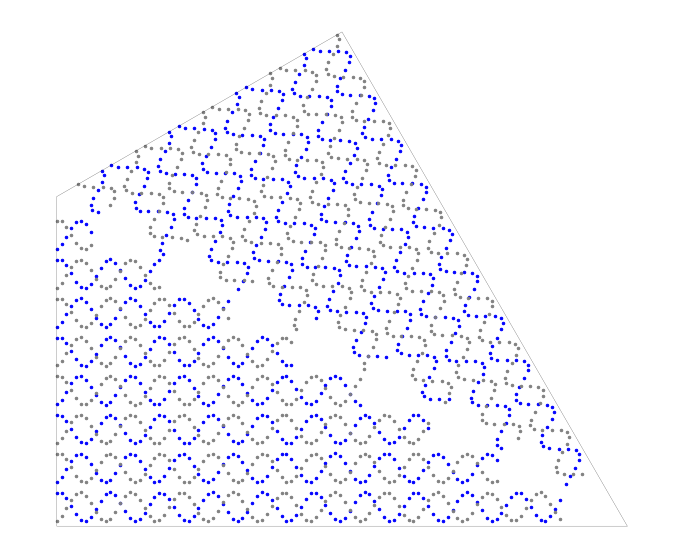

In [5]:
#Subunit with both Scaffold and staple coords 
plt.figure(figsize=[12,10])
plt.plot(x_scaf,y_scaf,".",markersize="5",color="blue") 
plt.plot(x_stap,y_stap,".",markersize="5", color="grey") 
plt.plot(kite_x,kite_y, color="black", linewidth=0.2)
plt.axis("equal")
plt.axis('off')

In [6]:
#Subunit Parameters

#scaffold Loop lengths
#scaffold loops occur between helices 2-3,4-5,6-7,10-11,12-13,14-15 (by design)
#this section is done via design

#finding the indexes in the coordinate list which correpsond to our desired terminal ends 
index=[]
for i in range(1,len(helices_lengths)+1): #changed bounds as we only want scaffold loops to occur from 2nd helix which is 
    ind=sum(helices_lengths[0:i])-1
    index.append(ind)

scaf_loops_length=[]
x_scaf_loops=[]
y_scaf_loops=[]
for i in range(0,len(index)-1):
    if i%2==1:
        if i !=7: #as at i=7= 8th helix ther is no scaffold, only stapel 
            ind1=index[i]
            ind2=index[i+1]
            #print(ind1,ind2)
            length= m.ceil((m.sqrt((x_scaf[ind1]-x_scaf[ind2])**2+(y_scaf[ind1]-y_scaf[ind2])**2+(z_scaf[ind1]-z_scaf[ind2])**2)/0.4)-1)
            scaf_loops_length.append(length)
            
            #appending coordinates for scaffold loops
            x1=x_scaf[ind1]
            x2=x_scaf[ind2]
            y1=y_scaf[ind1]
            y2=y_scaf[ind2]
            posx=(x1,x2)
            posy=(y1,y2)
            
            x_scaf_loops.append(posx)
            y_scaf_loops.append(posy)
            
print("Length of Scaffold Loops(nt)=",scaf_loops_length)

#scaffold Bridge Length
ind1=index[0]
ind2=index[len(index)-1]
scaf_bridge_length= m.ceil((m.sqrt((x_scaf[ind1]-x_scaf[ind2])**2+(y_scaf[ind1]-y_scaf[ind2])**2+(z_scaf[ind1]-z_scaf[ind2])**2)/0.4)-1)


#appending coordinates for scaffold bridge 
x_scaf_bridge=(x_scaf[ind1],x_scaf[ind2])
y_scaf_bridge=(y_scaf[ind1],y_scaf[ind2])

print("Length of Scaffold Bridge(nt)=",(scaf_bridge_length))

#Staple Bridge lengths
#staple bridges Occur between helices 2-15,3-14,4-13,5-12,6-11,7-10,8-9, following Tang et al they do not occur between 1 and 16
stap_bridge_length=[]
x_stap_bridge=[]
y_stap_bridge=[]
for i in range(0,int(len(index)/2)):
    if i>=1:
        ind1=index[i]
        ind2=index[len(index)-1-i]
        length= m.ceil((m.sqrt((x_stap[ind1]-x_stap[ind2])**2+(y_stap[ind1]-y_stap[ind2])**2+(z_stap[ind1]-z_stap[ind2])**2)/0.4)-1)
        stap_bridge_length.append(length)
        
        #appending coordinates for scaffold loops
        x1=x_stap[ind1]
        x2=x_stap[ind2]
        y1=y_stap[ind1]
        y2=y_stap[ind2]
        posx=(x1,x2)
        posy=(y1,y2)
            
        x_stap_bridge.append(posx)
        y_stap_bridge.append(posy)
        
print("Length of Staple Bridges(nt)=",stap_bridge_length)



Length of Scaffold Loops(nt)= [14, 13, 13, 12, 13, 14]
Length of Scaffold Bridge(nt)= 3
Length of Staple Bridges(nt)= [9, 7, 2, 2, 4, 8, 8]


(-41.681364039457776,
 1.9848268590217988,
 -1.7189104820265524,
 36.0971201225576)

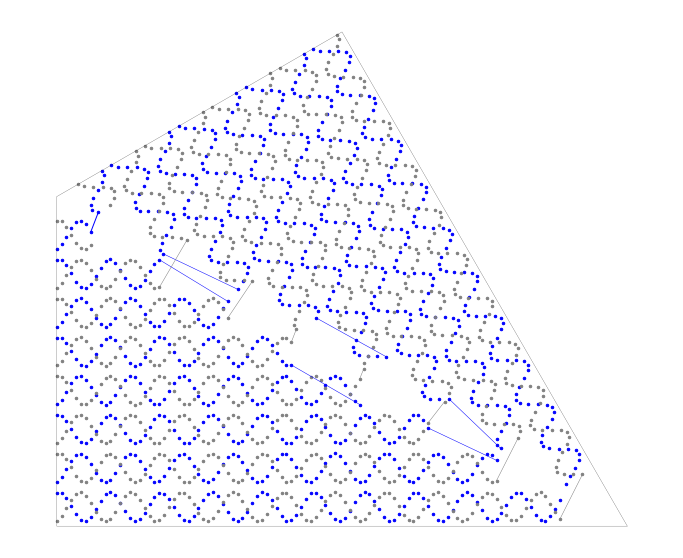

In [7]:
#diagram of Subunit
plt.figure(figsize=[12,10])
plt.plot(x_scaf,y_scaf,".",markersize="5",color="blue") 
plt.plot(x_stap,y_stap,".",markersize="5", color="grey") 
plt.plot(kite_x,kite_y, color="black", linewidth=0.2)

#plotting loops and bridges
#scaffold Bridge
plt.plot(x_scaf_bridge,y_scaf_bridge,"-",color="blue", linewidth="1")

#scaffold Loops
plt.plot(x_scaf_loops[0],y_scaf_loops[0],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[1],y_scaf_loops[1],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[2],y_scaf_loops[2],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[3],y_scaf_loops[3],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[4],y_scaf_loops[4],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[5],y_scaf_loops[5],"-", color="blue",linewidth="0.5")

#Staple_bridge
plt.plot(x_stap_bridge[0],y_stap_bridge[0],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[1],y_stap_bridge[1],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[2],y_stap_bridge[2],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[3],y_stap_bridge[3],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[4],y_stap_bridge[4],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[5],y_stap_bridge[5],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[6],y_stap_bridge[6],"-", color="grey",linewidth="0.5")

plt.axis("equal")
plt.axis('off')

In [8]:
#rotation of points 
def rotate_origin_only(xlist,ylist, degrees):
    """Only rotate a point around the origin (0, 0)."""
    xlist_rot=[]
    ylist_rot=[]
    for i in range(0,len(xlist)):
        x=xlist[i]
        y=ylist[i]
        
        x_new=x * m.cos(m.radians(degrees)) + y * m.sin(m.radians(degrees))
        y_new= -x * m.sin(m.radians(degrees)) + y * m.cos(m.radians(degrees))
        xlist_rot.append(x_new)
        ylist_rot.append(y_new)
        
    return (xlist_rot, ylist_rot)

#translation
def translate(xlist, ylist, xtrans, ytrans):
    xlist_trans=[]
    ylist_trans=[]
    
    for i in range(0,len(xlist)):
        x=xlist[i]
        y=ylist[i]
        
        x_new=x+xtrans
        y_new=y+ytrans
        xlist_trans.append(x_new)
        ylist_trans.append(y_new)
    
    return (xlist_trans, ylist_trans)
    

(-41.09261077309624, 110.84903005415833, -44.66697342842192, 64.68262402726873)

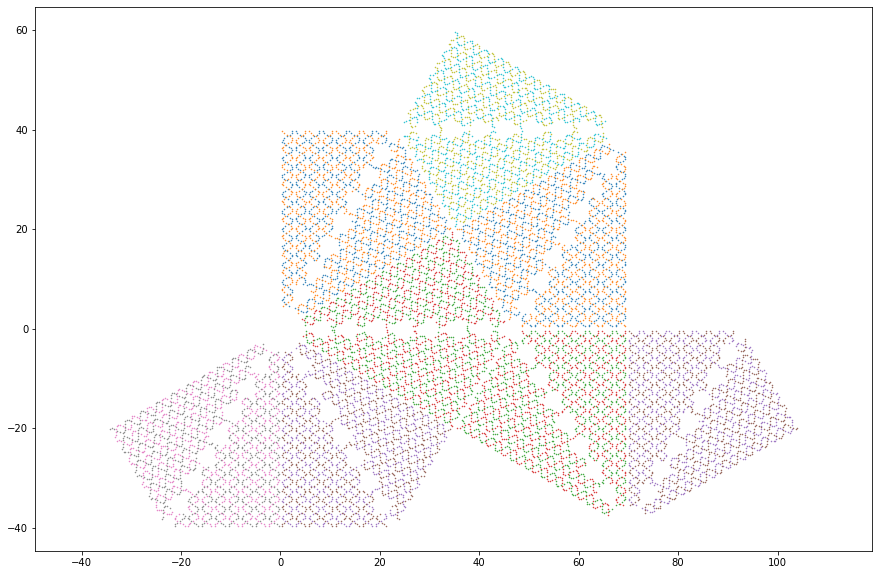

In [9]:
x_sub_1, y_sub_1 = rotate_origin_only(x_scaf,y_scaf,90)
x_stap_1, y_stap_1 = rotate_origin_only(x_stap,y_stap,90)

x_sub_2, y_sub_2 = rotate_origin_only(x_scaf,y_scaf,150)
x_stap_2, y_stap_2 = rotate_origin_only(x_stap,y_stap,150)

x_sub_3, y_sub_3 = rotate_origin_only(x_scaf,y_scaf,210)
x_stap_3, y_stap_3 = rotate_origin_only(x_stap,y_stap,210)

x_sub_4, y_sub_4 = rotate_origin_only(x_scaf,y_scaf,270)
x_stap_4, y_stap_4 = rotate_origin_only(x_stap,y_stap,270)

x_sub_5, y_sub_5 = rotate_origin_only(x_scaf,y_scaf,-30)
x_sub_5, y_sub_5= translate(x_sub_5,y_sub_5,2*h*m.cos(m.radians(30))+1,h+0.5)
x_stap_5, y_stap_5 = rotate_origin_only(x_stap,y_stap,-30)
x_stap_5, y_stap_5= translate(x_stap_5,y_stap_5,2*h*m.cos(m.radians(30))+1,h+0.5)


x_sub_6, y_sub_6 = rotate_origin_only(x_scaf,y_scaf,270)
x_sub_6, y_sub_6= translate(x_sub_6,y_sub_6,2*h*m.cos(m.radians(30))+1,h+0.5)
x_stap_6, y_stap_6 = rotate_origin_only(x_stap,y_stap,270)
x_stap_6, y_stap_6= translate(x_stap_6,y_stap_6,2*h*m.cos(m.radians(30))+1,h+0.5)


x_sub_7, y_sub_7 = rotate_origin_only(x_scaf,y_scaf,30)
x_sub_7, y_sub_7= translate(x_sub_7,y_sub_7,2*h*m.cos(m.radians(30))+1,-h-0.5)
x_stap_7, y_stap_7 = rotate_origin_only(x_stap,y_stap,30)
x_stap_7, y_stap_7= translate(x_stap_7,y_stap_7,2*h*m.cos(m.radians(30))+1,-h-0.5)


x_sub_8, y_sub_8 = rotate_origin_only(x_scaf,y_scaf,90)
x_sub_8, y_sub_8= translate(x_sub_8,y_sub_8,2*h*m.cos(m.radians(30))+1,-h-0.5)
x_stap_8, y_stap_8 = rotate_origin_only(x_stap,y_stap,90)
x_stap_8, y_stap_8= translate(x_stap_8,y_stap_8,2*h*m.cos(m.radians(30))+1,-h-0.5)

plt.figure(figsize=[15,10])
plt.plot(x_sub_1,y_sub_1,".",markersize="1")
plt.plot(x_stap_1,y_stap_1,".",markersize="1")

plt.plot(x_sub_2,y_sub_2,".",markersize="1")
plt.plot(x_stap_2,y_stap_2,".",markersize="1")

plt.plot(x_sub_3,y_sub_3,".",markersize="1")
plt.plot(x_stap_3,y_stap_3,".",markersize="1")

plt.plot(x_sub_4,y_sub_4,".",markersize="1")
plt.plot(x_stap_4,y_stap_4,".",markersize="1")

plt.plot(x_sub_5,y_sub_5,".",markersize="1")
plt.plot(x_stap_5,y_stap_5,".",markersize="1")

plt.plot(x_sub_6,y_sub_6,".",markersize="1")
plt.plot(x_stap_6,y_stap_6,".",markersize="1")

plt.plot(x_sub_7,y_sub_7,".",markersize="1")
plt.plot(x_stap_7,y_stap_7,".",markersize="1")

plt.plot(x_sub_8,y_sub_8,".",markersize="1")
plt.plot(x_stap_8,y_stap_8,".",markersize="1")


plt.axis("equal")


In [10]:
#lengths between Scaffold Bridges between subunits
#by construction we need additional scaffold brides between subunits 1-2,2-3,3-4,4-1,7-8,7-8

length1=m.ceil((m.sqrt((x_sub_1[index[8]]-x_sub_2[index[7]])**2+(y_sub_1[index[8]]-y_sub_2[index[7]])**2+(z_stap[index[8]]-z_stap[index[7]])**2)/0.4)-1)
length2=m.ceil((m.sqrt((x_sub_2[index[8]]-x_sub_3[index[7]])**2+(y_sub_2[index[8]]-y_sub_3[index[7]])**2+(z_stap[index[8]]-z_stap[index[7]])**2)/0.4)-1)
length3=m.ceil((m.sqrt((x_sub_3[index[8]]-x_sub_4[index[7]])**2+(y_sub_3[index[8]]-y_sub_4[index[7]])**2+(z_stap[index[8]]-z_stap[index[7]])**2)/0.4)-1)
length4=m.ceil((m.sqrt((x_sub_4[index[8]]-x_sub_1[index[7]])**2+(y_sub_4[index[8]]-y_sub_1[index[7]])**2+(z_stap[index[8]]-z_stap[index[7]])**2)/0.4)-1)
length5=m.ceil((m.sqrt((x_sub_7[index[8]]-x_sub_8[index[7]])**2+(y_sub_7[index[8]]-y_sub_8[index[7]])**2+(z_stap[index[8]]-z_stap[index[7]])**2)/0.4)-1)
length6=m.ceil((m.sqrt((x_sub_7[index[7]]-x_sub_8[index[8]])**2+(y_sub_7[index[7]]-y_sub_8[index[8]])**2+(z_stap[index[7]]-z_stap[index[8]])**2)/0.4)-1)
subunit_scaffold_bridge_lengths=[length1,length2,length3,length4,length5,length6]

print("Length of scaffold Bridges between subunits=",subunit_scaffold_bridge_lengths)


Length of scaffold Bridges between subunits= [10, 10, 10, 25, 10, 15]


From these assumed and caluclated parameters, we can calulate the total number of nucleotides required to meet these parameters. With a scaffold strand length in mind, we adjust h_min till is is the longest possible length sch that the total number of nucleotides in the scaffold does not exceed the desired scaffold length, we then add in extra nucleotides to specific lengths in order to reach the desired lenght. 

In [11]:
#Total length of scaffold Bridge
length_subunit=len(x_scaf)
length_all_sub=8*length_subunit
length_scaf_loops_subunit=sum(scaf_loops_length)+12 #adding 2 to each loop
length_all_scaf_loops=8*length_scaf_loops_subunit
length_scaf_bridge_subunit=scaf_bridge_length+3 #adding 3 to each scaffold
length_all_scaf_bridge=8*length_scaf_bridge_subunit +sum(subunit_scaffold_bridge_lengths) +8 #adding 2 to each 10 scaf bridge


total_length_scaf=length_all_sub+length_all_scaf_loops+length_all_scaf_bridge
print(total_length_scaf)
diff=(8064-total_length_scaf)
print(diff)

8064
0


[7, 29, 65, 114, 177, 254, 345, 449, 553, 644, 721, 784, 833, 869, 891, 899]


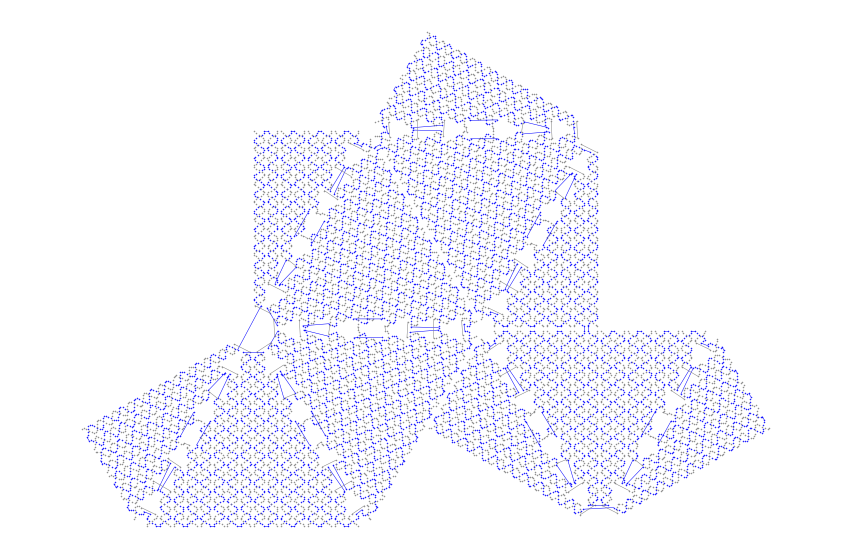

In [12]:
print(index)

plt.figure(figsize=[15,10])
plt.plot(x_sub_1,y_sub_1,".",markersize="1",color="blue")
plt.plot(x_sub_2,y_sub_2,".",markersize="1",color="blue")
plt.plot(x_sub_3,y_sub_3,".",markersize="1",color="blue")
plt.plot(x_sub_4,y_sub_4,".",markersize="1",color="blue")
plt.plot(x_sub_5,y_sub_5,".",markersize="1",color="blue")
plt.plot(x_sub_6,y_sub_6,".",markersize="1",color="blue")
plt.plot(x_sub_7,y_sub_7,".",markersize="1",color="blue")
plt.plot(x_sub_8,y_sub_8,".",markersize="1",color="blue")

plt.plot(x_stap_1,y_stap_1,".",markersize="1",color="grey")
plt.plot(x_stap_2,y_stap_2,".",markersize="1",color="grey")
plt.plot(x_stap_3,y_stap_3,".",markersize="1",color="grey")
plt.plot(x_stap_4,y_stap_4,".",markersize="1",color="grey")
plt.plot(x_stap_5,y_stap_5,".",markersize="1",color="grey")
plt.plot(x_stap_6,y_stap_6,".",markersize="1",color="grey")
plt.plot(x_stap_7,y_stap_7,".",markersize="1",color="grey")
plt.plot(x_stap_8,y_stap_8,".",markersize="1",color="grey")

#plotting scaffold bridges between subloop
plt.plot((x_sub_1[index[8]],x_sub_2[index[7]]),(y_sub_1[index[8]],y_sub_2[index[7]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_2[index[8]],x_sub_3[index[7]]),(y_sub_2[index[8]],y_sub_3[index[7]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_3[index[8]],x_sub_4[index[7]]),(y_sub_3[index[8]],y_sub_4[index[7]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_4[index[8]],x_sub_1[index[7]]),(y_sub_4[index[8]],y_sub_1[index[7]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_7[index[8]],x_sub_8[index[7]]),(y_sub_7[index[8]],y_sub_8[index[7]]),"-",linewidth="0.5",color="blue")

#plotting scaffold loops betwen subloops
plt.plot((x_sub_1[index[1]],x_sub_1[index[2]]),(y_sub_1[index[1]],y_sub_1[index[2]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[index[3]],x_sub_1[index[4]]),(y_sub_1[index[3]],y_sub_1[index[4]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[index[5]],x_sub_1[index[6]]),(y_sub_1[index[5]],y_sub_1[index[6]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[index[9]],x_sub_1[index[10]]),(y_sub_1[index[9]],y_sub_1[index[10]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[index[11]],x_sub_1[index[12]]),(y_sub_1[index[11]],y_sub_1[index[12]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[index[13]],x_sub_1[index[14]]),(y_sub_1[index[13]],y_sub_1[index[14]]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_2[index[1]],x_sub_2[index[2]]),(y_sub_2[index[1]],y_sub_2[index[2]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[index[3]],x_sub_2[index[4]]),(y_sub_2[index[3]],y_sub_2[index[4]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[index[5]],x_sub_2[index[6]]),(y_sub_2[index[5]],y_sub_2[index[6]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[index[9]],x_sub_2[index[10]]),(y_sub_2[index[9]],y_sub_2[index[10]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[index[11]],x_sub_2[index[12]]),(y_sub_2[index[11]],y_sub_2[index[12]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[index[13]],x_sub_2[index[14]]),(y_sub_2[index[13]],y_sub_2[index[14]]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_3[index[1]],x_sub_3[index[2]]),(y_sub_3[index[1]],y_sub_3[index[2]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[index[3]],x_sub_3[index[4]]),(y_sub_3[index[3]],y_sub_3[index[4]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[index[5]],x_sub_3[index[6]]),(y_sub_3[index[5]],y_sub_3[index[6]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[index[9]],x_sub_3[index[10]]),(y_sub_3[index[9]],y_sub_3[index[10]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[index[11]],x_sub_3[index[12]]),(y_sub_3[index[11]],y_sub_3[index[12]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[index[13]],x_sub_3[index[14]]),(y_sub_3[index[13]],y_sub_3[index[14]]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_4[index[1]],x_sub_4[index[2]]),(y_sub_4[index[1]],y_sub_4[index[2]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[index[3]],x_sub_4[index[4]]),(y_sub_4[index[3]],y_sub_4[index[4]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[index[5]],x_sub_4[index[6]]),(y_sub_4[index[5]],y_sub_4[index[6]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[index[9]],x_sub_4[index[10]]),(y_sub_4[index[9]],y_sub_4[index[10]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[index[11]],x_sub_4[index[12]]),(y_sub_4[index[11]],y_sub_4[index[12]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[index[13]],x_sub_4[index[14]]),(y_sub_4[index[13]],y_sub_4[index[14]]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_5[index[1]],x_sub_5[index[2]]),(y_sub_5[index[1]],y_sub_5[index[2]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[index[3]],x_sub_5[index[4]]),(y_sub_5[index[3]],y_sub_5[index[4]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[index[5]],x_sub_5[index[6]]),(y_sub_5[index[5]],y_sub_5[index[6]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[index[9]],x_sub_5[index[10]]),(y_sub_5[index[9]],y_sub_5[index[10]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[index[11]],x_sub_5[index[12]]),(y_sub_5[index[11]],y_sub_5[index[12]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[index[13]],x_sub_5[index[14]]),(y_sub_5[index[13]],y_sub_5[index[14]]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_6[index[1]],x_sub_6[index[2]]),(y_sub_6[index[1]],y_sub_6[index[2]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[index[3]],x_sub_6[index[4]]),(y_sub_6[index[3]],y_sub_6[index[4]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[index[5]],x_sub_6[index[6]]),(y_sub_6[index[5]],y_sub_6[index[6]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[index[9]],x_sub_6[index[10]]),(y_sub_6[index[9]],y_sub_6[index[10]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[index[11]],x_sub_6[index[12]]),(y_sub_6[index[11]],y_sub_6[index[12]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[index[13]],x_sub_6[index[14]]),(y_sub_6[index[13]],y_sub_6[index[14]]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_7[index[1]],x_sub_7[index[2]]),(y_sub_7[index[1]],y_sub_7[index[2]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[index[3]],x_sub_7[index[4]]),(y_sub_7[index[3]],y_sub_7[index[4]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[index[5]],x_sub_7[index[6]]),(y_sub_7[index[5]],y_sub_7[index[6]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[index[9]],x_sub_7[index[10]]),(y_sub_7[index[9]],y_sub_7[index[10]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[index[11]],x_sub_7[index[12]]),(y_sub_7[index[11]],y_sub_7[index[12]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[index[13]],x_sub_7[index[14]]),(y_sub_7[index[13]],y_sub_7[index[14]]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_8[index[1]],x_sub_8[index[2]]),(y_sub_8[index[1]],y_sub_8[index[2]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[index[3]],x_sub_8[index[4]]),(y_sub_8[index[3]],y_sub_8[index[4]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[index[5]],x_sub_8[index[6]]),(y_sub_8[index[5]],y_sub_8[index[6]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[index[9]],x_sub_8[index[10]]),(y_sub_8[index[9]],y_sub_8[index[10]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[index[11]],x_sub_8[index[12]]),(y_sub_8[index[11]],y_sub_8[index[12]]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[index[13]],x_sub_8[index[14]]),(y_sub_8[index[13]],y_sub_8[index[14]]),"-", color="blue",linewidth="0.5")


#staple Bridge
plt.plot((x_sub_1[index[0]],x_sub_1[899]),(y_sub_1[7],y_sub_1[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[index[0]],x_sub_2[899]),(y_sub_2[7],y_sub_2[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[index[0]],x_sub_3[899]),(y_sub_3[7],y_sub_3[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[index[0]],x_sub_4[899]),(y_sub_4[7],y_sub_4[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[index[0]],x_sub_5[899]),(y_sub_5[7],y_sub_5[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[index[0]],x_sub_6[899]),(y_sub_6[7],y_sub_6[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[index[0]],x_sub_7[899]),(y_sub_7[7],y_sub_7[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[index[0]],x_sub_8[899]),(y_sub_8[7],y_sub_8[899]),"-", color="blue",linewidth="0.5")

#plotting scaffold loops betwen subloops
plt.plot((x_sub_1[0],x_sub_1[8]),(y_sub_1[0],y_sub_1[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[30],x_sub_1[66]),(y_sub_1[30],y_sub_1[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[115],x_sub_1[178]),(y_sub_1[115],y_sub_1[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[255],x_sub_1[346]),(y_sub_1[255],y_sub_1[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[450],x_sub_1[554]),(y_sub_1[450],y_sub_1[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[645],x_sub_1[722]),(y_sub_1[645],y_sub_1[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[785],x_sub_1[834]),(y_sub_1[785],y_sub_1[834]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_1[870],x_sub_1[892]),(y_sub_1[870],y_sub_1[892]),"-", color="grey",linewidth="0.5")

plt.plot((x_sub_2[0],x_sub_2[8]),(y_sub_2[0],y_sub_2[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[30],x_sub_2[66]),(y_sub_2[30],y_sub_2[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[115],x_sub_2[178]),(y_sub_2[115],y_sub_2[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[255],x_sub_2[346]),(y_sub_2[255],y_sub_2[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[450],x_sub_2[554]),(y_sub_2[450],y_sub_2[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[645],x_sub_2[722]),(y_sub_2[645],y_sub_2[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[785],x_sub_2[834]),(y_sub_2[785],y_sub_2[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[870],x_sub_2[892]),(y_sub_2[870],y_sub_2[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_3[0],x_sub_3[8]),(y_sub_3[0],y_sub_3[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[30],x_sub_3[66]),(y_sub_3[30],y_sub_3[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[115],x_sub_3[178]),(y_sub_3[115],y_sub_3[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[255],x_sub_3[346]),(y_sub_3[255],y_sub_3[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[450],x_sub_3[554]),(y_sub_3[450],y_sub_3[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[645],x_sub_3[722]),(y_sub_3[645],y_sub_3[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[785],x_sub_3[834]),(y_sub_3[785],y_sub_3[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[870],x_sub_3[892]),(y_sub_3[870],y_sub_3[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_4[0],x_sub_4[8]),(y_sub_4[0],y_sub_4[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[30],x_sub_4[66]),(y_sub_4[30],y_sub_4[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[115],x_sub_4[178]),(y_sub_4[115],y_sub_4[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[255],x_sub_4[346]),(y_sub_4[255],y_sub_4[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[450],x_sub_4[554]),(y_sub_4[450],y_sub_4[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[645],x_sub_4[722]),(y_sub_4[645],y_sub_4[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[785],x_sub_4[834]),(y_sub_4[785],y_sub_4[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[870],x_sub_4[892]),(y_sub_4[870],y_sub_4[892]),"-", color="blue",linewidth="0.5")

#plt.plot((x_sub_5[0],x_sub_5[8]),(y_sub_5[0],y_sub_5[8]),"-", color="grey",linewidth="0.5")
plt.plot((x_sub_5[30],x_sub_5[66]),(y_sub_5[30],y_sub_5[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[115],x_sub_5[178]),(y_sub_5[115],y_sub_5[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[255],x_sub_5[346]),(y_sub_5[255],y_sub_5[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[450],x_sub_5[554]),(y_sub_5[450],y_sub_5[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[645],x_sub_5[722]),(y_sub_5[645],y_sub_5[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[785],x_sub_5[834]),(y_sub_5[785],y_sub_5[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[870],x_sub_5[892]),(y_sub_5[870],y_sub_5[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_6[0],x_sub_6[8]),(y_sub_6[0],y_sub_6[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[30],x_sub_6[66]),(y_sub_6[30],y_sub_6[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[115],x_sub_6[178]),(y_sub_6[115],y_sub_6[178]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_6[255],x_sub_6[346]),(y_sub_6[255],y_sub_6[346]),"-", color="grey",linewidth="0.5")
plt.plot((x_sub_6[450],x_sub_6[554]),(y_sub_6[450],y_sub_6[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[645],x_sub_6[722]),(y_sub_6[645],y_sub_6[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[785],x_sub_6[834]),(y_sub_6[785],y_sub_6[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[870],x_sub_6[892]),(y_sub_6[870],y_sub_6[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_7[0],x_sub_7[8]),(y_sub_7[0],y_sub_7[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[30],x_sub_7[66]),(y_sub_7[30],y_sub_7[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[115],x_sub_7[178]),(y_sub_7[115],y_sub_7[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[255],x_sub_7[346]),(y_sub_7[255],y_sub_7[346]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_7[450],x_sub_7[554]),(y_sub_7[450],y_sub_7[554]),"-", color="grey",linewidth="0.5")
plt.plot((x_sub_7[645],x_sub_7[722]),(y_sub_7[645],y_sub_7[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[785],x_sub_7[834]),(y_sub_7[785],y_sub_7[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[870],x_sub_7[892]),(y_sub_7[870],y_sub_7[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_8[0],x_sub_8[8]),(y_sub_8[0],y_sub_8[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[30],x_sub_8[66]),(y_sub_8[30],y_sub_8[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[115],x_sub_8[178]),(y_sub_8[115],y_sub_8[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[255],x_sub_8[346]),(y_sub_8[255],y_sub_8[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[450],x_sub_8[554]),(y_sub_8[450],y_sub_8[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[645],x_sub_8[722]),(y_sub_8[645],y_sub_8[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[785],x_sub_8[834]),(y_sub_8[785],y_sub_8[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[870],x_sub_8[892]),(y_sub_8[870],y_sub_8[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_1[870],x_sub_5[8]),(y_sub_1[870],y_sub_5[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[892],x_sub_5[0]),(y_sub_1[892],y_sub_5[0]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_7[450],x_sub_6[346]),(y_sub_7[450],y_sub_6[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[554],x_sub_6[255]),(y_sub_7[554],y_sub_6[255]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[449],x_sub_8[553]),(y_sub_7[449],y_sub_8[553]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[449],x_sub_5[553]),(y_sub_5[449],y_sub_5[553]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[449],x_sub_6[553]),(y_sub_6[449],y_sub_6[553]),"-", color="blue",linewidth="0.5")


#staple bridges
plt.plot((x_stap_1[index[0]],x_stap_1[index[15]]),(y_stap_1[index[0]],y_stap_1[index[15]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_1[index[1]],x_stap_1[index[14]]),(y_stap_1[index[1]],y_stap_1[index[14]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_1[index[2]],x_stap_1[index[13]]),(y_stap_1[index[2]],y_stap_1[index[13]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_1[index[3]],x_stap_1[index[12]]),(y_stap_1[index[3]],y_stap_1[index[12]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_1[index[4]],x_stap_1[index[11]]),(y_stap_1[index[4]],y_stap_1[index[11]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_1[index[5]],x_stap_1[index[10]]),(y_stap_1[index[5]],y_stap_1[index[10]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_1[index[6]],x_stap_1[index[9]]),(y_stap_1[index[6]],y_stap_1[index[9]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_1[index[7]],x_stap_1[index[8]]),(y_stap_1[index[7]],y_stap_1[index[8]]),"-",linewidth="0.5",color="grey")

plt.plot((x_stap_2[index[0]],x_stap_2[index[15]]),(y_stap_2[index[0]],y_stap_2[index[15]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_2[index[1]],x_stap_2[index[14]]),(y_stap_2[index[1]],y_stap_2[index[14]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_2[index[2]],x_stap_2[index[13]]),(y_stap_2[index[2]],y_stap_2[index[13]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_2[index[3]],x_stap_2[index[12]]),(y_stap_2[index[3]],y_stap_2[index[12]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_2[index[4]],x_stap_2[index[11]]),(y_stap_2[index[4]],y_stap_2[index[11]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_2[index[5]],x_stap_2[index[10]]),(y_stap_2[index[5]],y_stap_2[index[10]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_2[index[6]],x_stap_2[index[9]]),(y_stap_2[index[6]],y_stap_2[index[9]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_2[index[7]],x_stap_2[index[8]]),(y_stap_2[index[7]],y_stap_2[index[8]]),"-",linewidth="0.5",color="grey")

plt.plot((x_stap_3[index[0]],x_stap_3[index[15]]),(y_stap_3[index[0]],y_stap_3[index[15]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_3[index[1]],x_stap_3[index[14]]),(y_stap_3[index[1]],y_stap_3[index[14]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_3[index[2]],x_stap_3[index[13]]),(y_stap_3[index[2]],y_stap_3[index[13]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_3[index[3]],x_stap_3[index[12]]),(y_stap_3[index[3]],y_stap_3[index[12]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_3[index[4]],x_stap_3[index[11]]),(y_stap_3[index[4]],y_stap_3[index[11]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_3[index[5]],x_stap_3[index[10]]),(y_stap_3[index[5]],y_stap_3[index[10]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_3[index[6]],x_stap_3[index[9]]),(y_stap_3[index[6]],y_stap_3[index[9]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_3[index[7]],x_stap_3[index[8]]),(y_stap_3[index[7]],y_stap_3[index[8]]),"-",linewidth="0.5",color="grey")

plt.plot((x_stap_4[index[0]],x_stap_4[index[15]]),(y_stap_4[index[0]],y_stap_4[index[15]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_4[index[1]],x_stap_4[index[14]]),(y_stap_4[index[1]],y_stap_4[index[14]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_4[index[2]],x_stap_4[index[13]]),(y_stap_4[index[2]],y_stap_4[index[13]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_4[index[3]],x_stap_4[index[12]]),(y_stap_4[index[3]],y_stap_4[index[12]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_4[index[4]],x_stap_4[index[11]]),(y_stap_4[index[4]],y_stap_4[index[11]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_4[index[5]],x_stap_4[index[10]]),(y_stap_4[index[5]],y_stap_4[index[10]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_4[index[6]],x_stap_4[index[9]]),(y_stap_4[index[6]],y_stap_4[index[9]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_4[index[7]],x_stap_4[index[8]]),(y_stap_4[index[7]],y_stap_4[index[8]]),"-",linewidth="0.5",color="grey")

plt.plot((x_stap_5[index[0]],x_stap_5[index[15]]),(y_stap_5[index[0]],y_stap_5[index[15]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_5[index[1]],x_stap_5[index[14]]),(y_stap_5[index[1]],y_stap_5[index[14]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_5[index[2]],x_stap_5[index[13]]),(y_stap_5[index[2]],y_stap_5[index[13]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_5[index[3]],x_stap_5[index[12]]),(y_stap_5[index[3]],y_stap_5[index[12]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_5[index[4]],x_stap_5[index[11]]),(y_stap_5[index[4]],y_stap_5[index[11]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_5[index[5]],x_stap_5[index[10]]),(y_stap_5[index[5]],y_stap_5[index[10]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_5[index[6]],x_stap_5[index[9]]),(y_stap_5[index[6]],y_stap_5[index[9]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_5[index[7]],x_stap_5[index[8]]),(y_stap_5[index[7]],y_stap_5[index[8]]),"-",linewidth="0.5",color="grey")

plt.plot((x_stap_6[index[0]],x_stap_6[index[15]]),(y_stap_6[index[0]],y_stap_6[index[15]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_6[index[1]],x_stap_6[index[14]]),(y_stap_6[index[1]],y_stap_6[index[14]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_6[index[2]],x_stap_6[index[13]]),(y_stap_6[index[2]],y_stap_6[index[13]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_6[index[3]],x_stap_6[index[12]]),(y_stap_6[index[3]],y_stap_6[index[12]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_6[index[4]],x_stap_6[index[11]]),(y_stap_6[index[4]],y_stap_6[index[11]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_6[index[5]],x_stap_6[index[10]]),(y_stap_6[index[5]],y_stap_6[index[10]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_6[index[6]],x_stap_6[index[9]]),(y_stap_6[index[6]],y_stap_6[index[9]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_6[index[7]],x_stap_6[index[8]]),(y_stap_6[index[7]],y_stap_6[index[8]]),"-",linewidth="0.5",color="grey")

plt.plot((x_stap_7[index[0]],x_stap_7[index[15]]),(y_stap_7[index[0]],y_stap_7[index[15]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_7[index[1]],x_stap_7[index[14]]),(y_stap_7[index[1]],y_stap_7[index[14]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_7[index[2]],x_stap_7[index[13]]),(y_stap_7[index[2]],y_stap_7[index[13]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_7[index[3]],x_stap_7[index[12]]),(y_stap_7[index[3]],y_stap_7[index[12]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_7[index[4]],x_stap_7[index[11]]),(y_stap_7[index[4]],y_stap_7[index[11]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_7[index[5]],x_stap_7[index[10]]),(y_stap_7[index[5]],y_stap_7[index[10]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_7[index[6]],x_stap_7[index[9]]),(y_stap_7[index[6]],y_stap_7[index[9]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_7[index[7]],x_stap_7[index[8]]),(y_stap_7[index[7]],y_stap_7[index[8]]),"-",linewidth="0.5",color="grey")

plt.plot((x_stap_8[index[0]],x_stap_8[index[15]]),(y_stap_8[index[0]],y_stap_8[index[15]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_8[index[1]],x_stap_8[index[14]]),(y_stap_8[index[1]],y_stap_8[index[14]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_8[index[2]],x_stap_8[index[13]]),(y_stap_8[index[2]],y_stap_8[index[13]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_8[index[3]],x_stap_8[index[12]]),(y_stap_8[index[3]],y_stap_8[index[12]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_8[index[4]],x_stap_8[index[11]]),(y_stap_8[index[4]],y_stap_8[index[11]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_8[index[5]],x_stap_8[index[10]]),(y_stap_8[index[5]],y_stap_8[index[10]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_8[index[6]],x_stap_8[index[9]]),(y_stap_8[index[6]],y_stap_8[index[9]]),"-",linewidth="0.5",color="grey")
plt.plot((x_stap_8[index[7]],x_stap_8[index[8]]),(y_stap_8[index[7]],y_stap_8[index[8]]),"-",linewidth="0.5",color="grey")


plt.axis("equal")
plt.axis('off')

dir_name= "/Users/ali/Documents/USyd/Honours/Figures/Diagrams/"
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(dir_name))
plt.savefig("16 helix model",dpi=300, bbox_inches='tight')



12 helices model
--


In [13]:
#Generating intitial values

#change these depending on your parameters 
r=0.34 #rise (nm) per base pair 
D=2.7 #interhelical distance 
alpha=60 #angle end of base sub unit
h_min= 36 #shortest helix
H=12 #number of helices per subunit
pc=15 #phase Correction
dhtd=10.44 #doble-helical twist density (bp/turn)
ddh=2 #double heox diameter

#Helical extension 
E= D/(m.tan(m.radians(alpha/2)))

#additional base pairs per helix
n_bp=D/(r*m.tan(m.radians(alpha/2)))

#number of base pairs in each string 
helices_lengths=[]
for j in range(1,H+1):
    if j<=H/2:
        length_helix= round(h_min+((j-1)*n_bp))
        helices_lengths.append(length_helix)
    if j>=H/2+1:
        length_helix= round(h_min+((H-j)*n_bp))
        helices_lengths.append(length_helix)

h_max=max(helices_lengths)#max helix length
gap= D/(m.tan(m.radians(alpha/2)))
h= ((h_max-1)*r)+gap 

print("Interhelical Distance, D=",D,"nm")
print("r=",r,"nm/bp")
print("Helices per Subunit=",H)
print("E=",E)
print('n_bp=',n_bp)
print("Length of Helices(bp)=",helices_lengths)
print("Min Helix length(bp)",h_min)
print("Max Helix length(bp)=",h_max)
print("h(nm)=",h)

Interhelical Distance, D= 2.7 nm
r= 0.34 nm/bp
Helices per Subunit= 12
E= 4.67653718043597
n_bp= 13.754521118929324
Length of Helices(bp)= [36, 50, 64, 77, 91, 105, 105, 91, 77, 64, 50, 36]
Min Helix length(bp) 36
Max Helix length(bp)= 105
h(nm)= 40.03653718043597


(-42.03836403945777,
 2.0018268590217985,
 -1.7336329138908877,
 36.40629119170864)

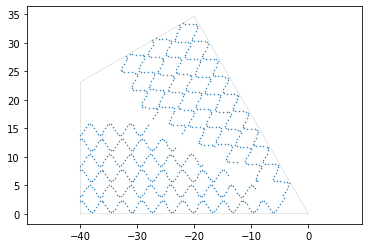

In [14]:
#Scaffold Strand Coordinates

#Coordinates of subunit in iscocelese triangle form
scaffold_coords_initial=[]
for n in range(0,len(helices_lengths)):
    j=n+1
    coords=[]
    
    for k in range(0,helices_lengths[n]):
        i=k+1
        
        x=-h+(0.34*(i-1))
        
        if j%2 ==1:
            a1=(D-2)/2
            b1=((H/2)-j)*D
            theta=((360*(i-1))/10.44)+15
            c1=(1-m.cos(m.radians(theta)))
            
            
            y=a1+b1+c1
            z=-(m.sin(m.radians(theta)))
        else:
            y=(-(D-ddh)/ddh)+((H/2)-j+1)*D -(1-m.cos(m.radians(((360*(i-1))/dhtd)-pc)))
            z=-m.sin(m.radians(((360*(i-1))/dhtd)-15))
        pos=(x,y,z)
        
        scaffold_coords_initial.append(pos)

#applying a transformation to create kite structure

scaffold_coords=[]
for i in range(0, len(scaffold_coords_initial)):
    if i<=int(len(scaffold_coords_initial)/2)-1:
        point=scaffold_coords_initial[i]
        x=point[0]
        y=point[1]
        z=point[2]
    else:
        point=scaffold_coords_initial[i]
        beta= 360-alpha
        x=(point[0]*m.cos(m.radians(beta)))-(point[1]*m.sin(m.radians(beta)))
        y=(point[0]*m.sin(m.radians(beta)))+(point[1]*m.cos(m.radians(beta)))
        z=point[2]
   
        
        #beta=m.degrees(m.atan(point[1]/point[0]))
        #theta=(180+beta)-(alpha)
        #rad=m.sqrt((point[0])**2+(point[1])**2)
        #x=rad*m.cos(m.radians(theta))
        #y=rad*m.sin(m.radians(theta))
        #z=point[2]
   
    pos=(x,y,z)
    
    scaffold_coords.append(pos)

x_scaf=[]
y_scaf=[]
z_scaf=[]
for i in range(0,len(scaffold_coords)):
    point=scaffold_coords[i]
    x=point[0]
    y=point[1]
    z=point[2]
    
    x_scaf.append(x)
    y_scaf.append(y)
    z_scaf.append(z)

#kite coords
kite_x=(0,-h,-h,-h*m.cos(m.radians(alpha)),0)
kite_y=(0,0,h*m.tan(m.radians(alpha/2)),h*m.sin(m.radians(alpha)),0)
        
#plotting 
plt.plot(x_scaf,y_scaf,".",markersize="1") 
plt.plot(kite_x,kite_y, color="grey", linewidth="0.2")
plt.axis("equal")

(-42.03836403945777,
 2.0018268590217985,
 -1.7336329138908877,
 36.40629119170864)

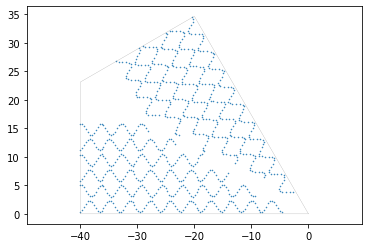

In [15]:
#Staple Strand Coordinates
staple_coords_initial=[]
for n in range(0,len(helices_lengths)):
    j=n+1
    coords=[]
    
    for k in range(0,helices_lengths[n]):
        i=k+1
        
        x=-h+(0.34*(i-1))
        
        if j%2 ==1:
            a1=(D-2)/2
            b1=((H/2)-j)*D
            theta=((360*(i-1))/10.44)+15 +150
            c1=(1-m.cos(m.radians(theta)))
            

            y=a1+b1+c1
            z=-(m.sin(m.radians(theta)))
        else:
            y=(-(D-2)/2)+((H/2)-j+1)*D -(1-m.cos(m.radians(((360*(i-1))/dhtd)-pc-150)))
            z=-m.sin(m.radians(((360*(i-1))/dhtd)-15-150))
        pos=(x,y,z)
        
        staple_coords_initial.append(pos)

#applying a transformation to create Kite 
staple_coords=[]
for i in range(0, len(staple_coords_initial)):
    if i<=int(len(staple_coords_initial)/2)-1:
        point=staple_coords_initial[i]
        x=point[0]
        y=point[1]
        z=point[2]
    else:
        point=staple_coords_initial[i]
        beta= 360-alpha
        x=(point[0]*m.cos(m.radians(beta)))-(point[1]*m.sin(m.radians(beta)))
        y=(point[0]*m.sin(m.radians(beta)))+(point[1]*m.cos(m.radians(beta)))
        z=point[2]
   
        #beta=m.degrees(m.atan(point[1]/point[0]))
        #theta=(180+beta)-(alpha)
        #rad=m.sqrt((point[0])**2+(point[1])**2)
        #x=rad*m.cos(m.radians(theta))
        #y=rad*m.sin(m.radians(theta))
        #z=point[2]
   
    pos=(x,y,z)
    
    staple_coords.append(pos)

x_stap=[]
y_stap=[]
z_stap=[]
for i in range(0,len(staple_coords)):
    point=staple_coords[i]
    x=point[0]
    y=point[1]
    z=point[2]
    
    x_stap.append(x)
    y_stap.append(y)
    z_stap.append(z)

#kite coords
kite_x=(0,-h,-h,-h*m.cos(m.radians(alpha)),0)
kite_y=(0,0,h*m.tan(m.radians(alpha/2)),h*m.sin(m.radians(alpha)),0)
        
#plotting 
plt.plot(x_stap,y_stap,".",markersize="1") 
plt.plot(kite_x,kite_y, color="grey", linewidth="0.2")
plt.axis("equal")

(-42.03836403945777,
 2.0018268590217985,
 -1.7336329138908877,
 36.40629119170864)

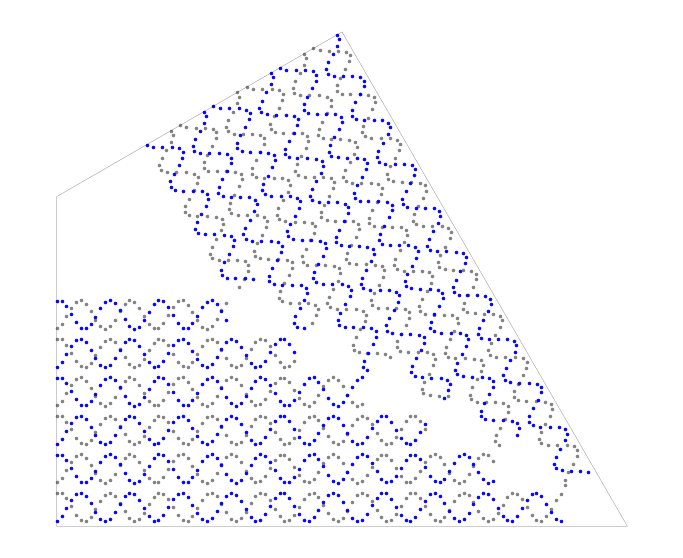

In [16]:
#Subunit with both Scaffold and staple coords 
plt.figure(figsize=[12,10])
plt.plot(x_scaf,y_scaf,".",markersize="5",color="grey") 
plt.plot(x_stap,y_stap,".",markersize="5", color="blue") 
plt.plot(kite_x,kite_y, color="black", linewidth=0.2)
plt.axis("equal")
plt.axis('off')

In [17]:
#Subunit Parameters

#scaffold Loop lengths
#scaffold loops occur between helices 2-3,4-5,8-9,10-11 (by design)
#this section is done via design

#finding the indexes in the coordinate list which correpsond to our desired terminal ends 
index=[]
for i in range(1,len(helices_lengths)+1):
    ind=sum(helices_lengths[0:i])-1
    index.append(ind)

scaf_loops_length=[]
x_scaf_loops=[]
y_scaf_loops=[]
for i in range(0,len(index)-1):
    if i%2==1:
        if i !=5: #as at i=5= 6th helix ther is no scaffold, only stapel 
            ind1=index[i]
            ind2=index[i+1]
            #print(ind1,ind2)
            length= m.ceil((m.sqrt((x_scaf[ind1]-x_scaf[ind2])**2+(y_scaf[ind1]-y_scaf[ind2])**2+(z_scaf[ind1]-z_scaf[ind2])**2)/0.4)-1)
            scaf_loops_length.append(length)
            
            #appending coordinates for scaffold loops
            x1=x_scaf[ind1]
            x2=x_scaf[ind2]
            y1=y_scaf[ind1]
            y2=y_scaf[ind2]
            posx=(x1,x2)
            posy=(y1,y2)
            
            x_scaf_loops.append(posx)
            y_scaf_loops.append(posy)
            
print("Length of Scaffold Loops(nt)=",scaf_loops_length)

#scaffold Bridge Length
ind1=index[0]
ind2=index[len(index)-1]
scaf_bridge_length= m.ceil((m.sqrt((x_scaf[ind1]-x_scaf[ind2])**2+(y_scaf[ind1]-y_scaf[ind2])**2+(z_scaf[ind1]-z_scaf[ind2])**2)/0.4)-1)


#appending coordinates for scaffold bridge 
x_scaf_bridge=(x_scaf[ind1],x_scaf[ind2])
y_scaf_bridge=(y_scaf[ind1],y_scaf[ind2])

print("Length of Scaffold Bridge(nt)=",(scaf_bridge_length))

#Staple Bridge lengths
#staple bridges Occur between helices 2-11,3-10,4-9,5-8,6-7
stap_bridge_length=[]
x_stap_bridge=[]
y_stap_bridge=[]
for i in range(0,int(len(index)/2)):
    if i>=1:
        ind1=index[i]
        ind2=index[len(index)-1-i]
        length= m.ceil((m.sqrt((x_stap[ind1]-x_stap[ind2])**2+(y_stap[ind1]-y_stap[ind2])**2+(z_stap[ind1]-z_stap[ind2])**2)/0.4)-1)
        stap_bridge_length.append(length)
        
        #appending coordinates for scaffold loops
        x1=x_stap[ind1]
        x2=x_stap[ind2]
        y1=y_stap[ind1]
        y2=y_stap[ind2]
        posx=(x1,x2)
        posy=(y1,y2)
            
        x_stap_bridge.append(posx)
        y_stap_bridge.append(posy)
        
print("Length of Staple Bridges(nt)=",stap_bridge_length)



Length of Scaffold Loops(nt)= [14, 13, 12, 15]
Length of Scaffold Bridge(nt)= 3
Length of Staple Bridges(nt)= [4, 1, 5, 9, 9]


(-42.03836403945777,
 2.0018268590217985,
 -1.7336329138908877,
 36.40629119170864)

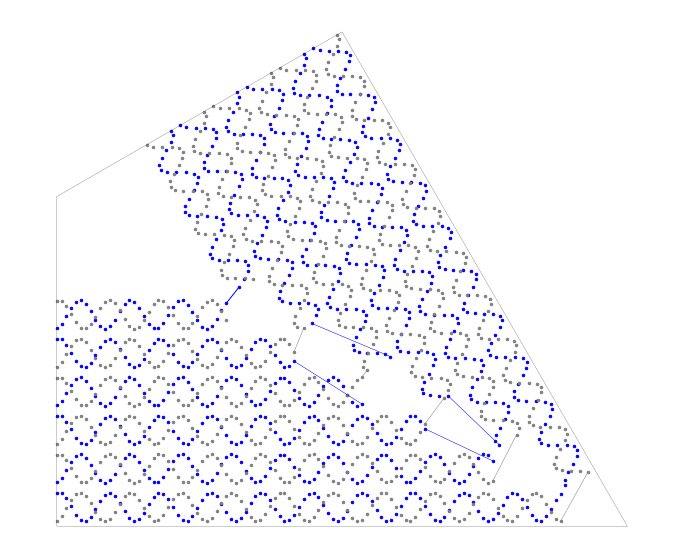

In [18]:
#diagram of Subunit
plt.figure(figsize=[12,10])
plt.plot(x_scaf,y_scaf,".",markersize="5",color="blue") 
plt.plot(x_stap,y_stap,".",markersize="5", color="grey") 
plt.plot(kite_x,kite_y, color="black", linewidth=0.2)

#plotting loops and bridges
#scaffold Bridge
plt.plot(x_scaf_bridge,y_scaf_bridge,"-",color="blue", linewidth="1")

#scaffold Loops
plt.plot(x_scaf_loops[0],y_scaf_loops[0],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[1],y_scaf_loops[1],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[2],y_scaf_loops[2],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[3],y_scaf_loops[3],"-", color="blue",linewidth="0.5")

#Staple_bridge
plt.plot(x_stap_bridge[0],y_stap_bridge[0],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[1],y_stap_bridge[1],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[2],y_stap_bridge[2],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[3],y_stap_bridge[3],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[4],y_stap_bridge[4],"-", color="grey",linewidth="0.5")

plt.axis("equal")
plt.axis('off')

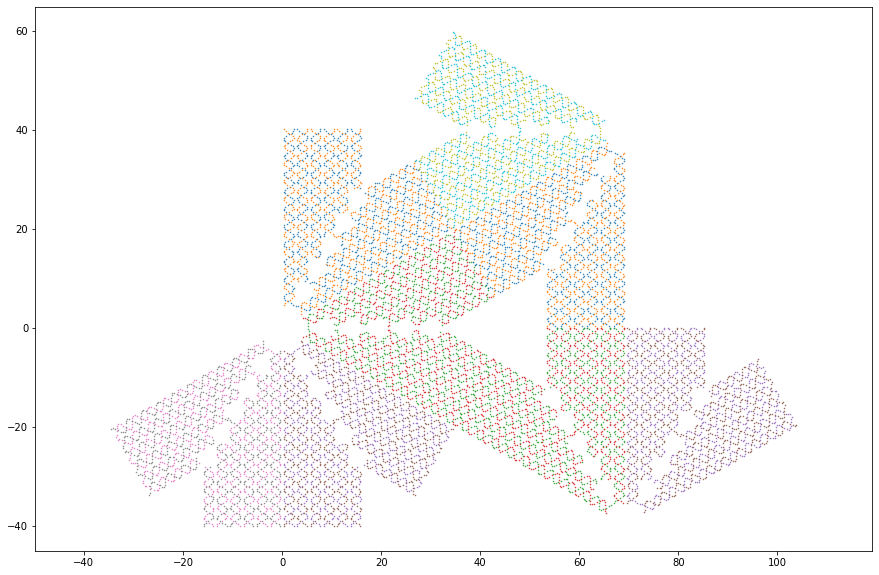

In [19]:
x_sub_1, y_sub_1 = rotate_origin_only(x_scaf,y_scaf,90)
x_stap_1, y_stap_1 = rotate_origin_only(x_stap,y_stap,90)

x_sub_2, y_sub_2 = rotate_origin_only(x_scaf,y_scaf,150)
x_stap_2, y_stap_2 = rotate_origin_only(x_stap,y_stap,150)

x_sub_3, y_sub_3 = rotate_origin_only(x_scaf,y_scaf,210)
x_stap_3, y_stap_3 = rotate_origin_only(x_stap,y_stap,210)

x_sub_4, y_sub_4 = rotate_origin_only(x_scaf,y_scaf,270)
x_stap_4, y_stap_4 = rotate_origin_only(x_stap,y_stap,270)

x_sub_5, y_sub_5 = rotate_origin_only(x_scaf,y_scaf,-30)
x_sub_5, y_sub_5= translate(x_sub_5,y_sub_5,2*h*m.cos(m.radians(30)),h)
x_stap_5, y_stap_5 = rotate_origin_only(x_stap,y_stap,-30)
x_stap_5, y_stap_5= translate(x_stap_5,y_stap_5,2*h*m.cos(m.radians(30)),h)


x_sub_6, y_sub_6 = rotate_origin_only(x_scaf,y_scaf,270)
x_sub_6, y_sub_6= translate(x_sub_6,y_sub_6,2*h*m.cos(m.radians(30)),h)
x_stap_6, y_stap_6 = rotate_origin_only(x_stap,y_stap,270)
x_stap_6, y_stap_6= translate(x_stap_6,y_stap_6,2*h*m.cos(m.radians(30)),h)


x_sub_7, y_sub_7 = rotate_origin_only(x_scaf,y_scaf,30)
x_sub_7, y_sub_7= translate(x_sub_7,y_sub_7,2*h*m.cos(m.radians(30)),-h)
x_stap_7, y_stap_7 = rotate_origin_only(x_stap,y_stap,30)
x_stap_7, y_stap_7= translate(x_stap_7,y_stap_7,2*h*m.cos(m.radians(30)),-h)


x_sub_8, y_sub_8 = rotate_origin_only(x_scaf,y_scaf,90)
x_sub_8, y_sub_8= translate(x_sub_8,y_sub_8,2*h*m.cos(m.radians(30)),-h)
x_stap_8, y_stap_8 = rotate_origin_only(x_stap,y_stap,90)
x_stap_8, y_stap_8= translate(x_stap_8,y_stap_8,2*h*m.cos(m.radians(30)),-h)

plt.figure(figsize=[15,10])
plt.plot(x_sub_1,y_sub_1,".",markersize="1")
plt.plot(x_stap_1,y_stap_1,".",markersize="1")

plt.plot(x_sub_2,y_sub_2,".",markersize="1")
plt.plot(x_stap_2,y_stap_2,".",markersize="1")

plt.plot(x_sub_3,y_sub_3,".",markersize="1")
plt.plot(x_stap_3,y_stap_3,".",markersize="1")

plt.plot(x_sub_4,y_sub_4,".",markersize="1")
plt.plot(x_stap_4,y_stap_4,".",markersize="1")

plt.plot(x_sub_5,y_sub_5,".",markersize="1")
plt.plot(x_stap_5,y_stap_5,".",markersize="1")

plt.plot(x_sub_6,y_sub_6,".",markersize="1")
plt.plot(x_stap_6,y_stap_6,".",markersize="1")

plt.plot(x_sub_7,y_sub_7,".",markersize="1")
plt.plot(x_stap_7,y_stap_7,".",markersize="1")

plt.plot(x_sub_8,y_sub_8,".",markersize="1")
plt.plot(x_stap_8,y_stap_8,".",markersize="1")


plt.axis("equal")
dir_name= "/Users/ali/Documents/USyd/Honours/Figures/Diagrams/"
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(dir_name))
plt.savefig("12 Helix Model- unedited",dpi=300, bbox_inches='tight')




In [20]:
#lengths between Scaffold Bridges between subunits
#by construction we need additional scaffold brides between subunits 1-2,2-3,3-4,4-1,7-8,7-8

length1=m.ceil((m.sqrt((x_sub_1[index[6]]-x_sub_2[index[5]])**2+(y_sub_1[index[6]]-y_sub_2[index[5]])**2+(z_stap[index[6]]-z_stap[index[5]])**2)/0.4)-1)
length2=m.ceil((m.sqrt((x_sub_2[index[6]]-x_sub_3[index[5]])**2+(y_sub_2[index[6]]-y_sub_3[index[5]])**2+(z_stap[index[6]]-z_stap[index[5]])**2)/0.4)-1)
length3=m.ceil((m.sqrt((x_sub_3[index[6]]-x_sub_4[index[5]])**2+(y_sub_3[index[6]]-y_sub_4[index[5]])**2+(z_stap[index[6]]-z_stap[index[5]])**2)/0.4)-1)
length4=m.ceil((m.sqrt((x_sub_4[index[6]]-x_sub_1[index[5]])**2+(y_sub_4[index[6]]-y_sub_1[index[5]])**2+(z_stap[index[6]]-z_stap[index[5]])**2)/0.4)-1)
length5=m.ceil((m.sqrt((x_sub_7[index[6]]-x_sub_8[index[5]])**2+(y_sub_7[index[6]]-y_sub_8[index[5]])**2+(z_stap[index[6]]-z_stap[index[5]])**2)/0.4)-1)
length6=m.ceil((m.sqrt((x_sub_7[index[5]]-x_sub_8[index[6]])**2+(y_sub_7[index[5]]-y_sub_8[index[6]])**2+(z_stap[index[5]]-z_stap[index[6]])**2)/0.4)-1)
subunit_scaffold_bridge_lengths=[length1,length2,length3,length4,length5,length6]

print("Length of scaffold Bridges between subunits=",subunit_scaffold_bridge_lengths)


Length of scaffold Bridges between subunits= [11, 11, 11, 26, 11, 14]


In [21]:
#Total length of scaffold Bridge
length_subunit=len(x_scaf)
length_all_sub=8*length_subunit
length_scaf_loops_subunit=sum(scaf_loops_length)
length_all_scaf_loops=8*length_scaf_loops_subunit
length_scaf_bridge_subunit=scaf_bridge_length
length_all_scaf_bridge=10*length_scaf_bridge_subunit +sum(subunit_scaffold_bridge_lengths)


total_length_scaf=length_all_sub+length_all_scaf_loops+length_all_scaf_bridge
print(total_length_scaf)
diff=(7249-total_length_scaf)
print(diff)

7314
-65


(-41.39594913784028, 110.7412656934758, -45.024473428421906, 64.71012402726872)

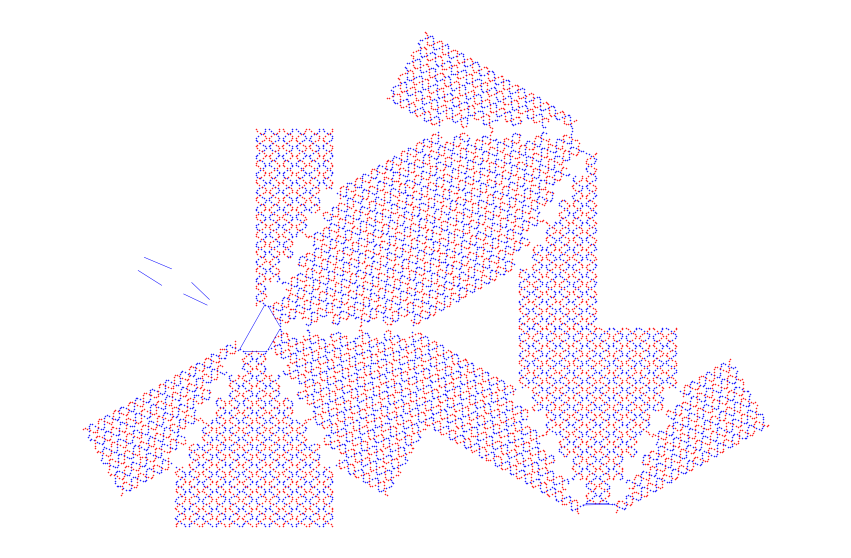

In [22]:
plt.figure(figsize=[15,10])
plt.plot(x_sub_1,y_sub_1,".",markersize="1",color="blue")
plt.plot(x_sub_2,y_sub_2,".",markersize="1",color="blue")
plt.plot(x_sub_3,y_sub_3,".",markersize="1",color="blue")
plt.plot(x_sub_4,y_sub_4,".",markersize="1",color="blue")
plt.plot(x_sub_5,y_sub_5,".",markersize="1",color="blue")
plt.plot(x_sub_6,y_sub_6,".",markersize="1",color="blue")
plt.plot(x_sub_7,y_sub_7,".",markersize="1",color="blue")
plt.plot(x_sub_8,y_sub_8,".",markersize="1",color="blue")

plt.plot(x_stap_1,y_stap_1,".",markersize="1",color="red")
plt.plot(x_stap_2,y_stap_2,".",markersize="1",color="red")
plt.plot(x_stap_3,y_stap_3,".",markersize="1",color="red")
plt.plot(x_stap_4,y_stap_4,".",markersize="1",color="red")
plt.plot(x_stap_5,y_stap_5,".",markersize="1",color="red")
plt.plot(x_stap_6,y_stap_6,".",markersize="1",color="red")
plt.plot(x_stap_7,y_stap_7,".",markersize="1",color="red")
plt.plot(x_stap_8,y_stap_8,".",markersize="1",color="red")

#plotting scaffold bridges between subloop
plt.plot((x_sub_1[index[6]],x_sub_2[index[5]]),(y_sub_1[index[6]],y_sub_2[index[5]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_2[index[6]],x_sub_3[index[5]]),(y_sub_2[index[6]],y_sub_3[index[5]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_3[index[6]],x_sub_4[index[5]]),(y_sub_3[index[6]],y_sub_4[index[5]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_4[index[6]],x_sub_1[index[5]]),(y_sub_4[index[6]],y_sub_1[index[5]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_7[index[6]],x_sub_8[index[5]]),(y_sub_7[index[6]],y_sub_8[index[5]]),"-",linewidth="0.5",color="blue")
plt.plot((x_sub_8[index[6]],x_sub_7[index[5]]),(y_sub_8[index[6]],y_sub_7[index[5]]),"-",linewidth="0.5",color="blue")

plt.plot(x_scaf_loops[0],y_scaf_loops[0],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[1],y_scaf_loops[1],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[2],y_scaf_loops[2],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[3],y_scaf_loops[3],"-", color="blue",linewidth="0.5")

"""""
#plotting scaffold loops betwen subloops
plt.plot((x_sub_1[29],x_sub_1[65]),(y_sub_1[29],y_sub_1[65]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[114],x_sub_1[177]),(y_sub_1[114],y_sub_1[177]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[254],x_sub_1[345]),(y_sub_1[254],y_sub_1[345]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[644],x_sub_1[721]),(y_sub_1[644],y_sub_1[721]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[784],x_sub_1[833]),(y_sub_1[784],y_sub_1[833]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[869],x_sub_1[891]),(y_sub_1[869],y_sub_1[891]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[29],x_sub_2[65]),(y_sub_2[29],y_sub_2[65]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[114],x_sub_2[177]),(y_sub_2[114],y_sub_2[177]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[254],x_sub_2[345]),(y_sub_2[254],y_sub_2[345]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[644],x_sub_2[721]),(y_sub_2[644],y_sub_2[721]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[784],x_sub_2[833]),(y_sub_2[784],y_sub_2[833]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[869],x_sub_2[891]),(y_sub_2[869],y_sub_2[891]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[29],x_sub_3[65]),(y_sub_3[29],y_sub_3[65]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[114],x_sub_3[177]),(y_sub_3[114],y_sub_3[177]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[254],x_sub_3[345]),(y_sub_3[254],y_sub_3[345]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[644],x_sub_3[721]),(y_sub_3[644],y_sub_3[721]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[784],x_sub_3[833]),(y_sub_3[784],y_sub_3[833]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[869],x_sub_3[891]),(y_sub_3[869],y_sub_3[891]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[29],x_sub_4[65]),(y_sub_4[29],y_sub_4[65]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[114],x_sub_4[177]),(y_sub_4[114],y_sub_4[177]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[254],x_sub_4[345]),(y_sub_4[254],y_sub_4[345]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[644],x_sub_4[721]),(y_sub_4[644],y_sub_4[721]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[784],x_sub_4[833]),(y_sub_4[784],y_sub_4[833]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[869],x_sub_4[891]),(y_sub_4[869],y_sub_4[891]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[29],x_sub_5[65]),(y_sub_5[29],y_sub_5[65]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[114],x_sub_5[177]),(y_sub_5[114],y_sub_5[177]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[254],x_sub_5[345]),(y_sub_5[254],y_sub_5[345]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[644],x_sub_5[721]),(y_sub_5[644],y_sub_5[721]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[784],x_sub_5[833]),(y_sub_5[784],y_sub_5[833]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[869],x_sub_5[891]),(y_sub_5[869],y_sub_5[891]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[29],x_sub_6[65]),(y_sub_6[29],y_sub_6[65]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[114],x_sub_6[177]),(y_sub_6[114],y_sub_6[177]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[254],x_sub_6[345]),(y_sub_6[254],y_sub_6[345]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[644],x_sub_6[721]),(y_sub_6[644],y_sub_6[721]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[784],x_sub_6[833]),(y_sub_6[784],y_sub_6[833]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[869],x_sub_6[891]),(y_sub_6[869],y_sub_6[891]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_7[29],x_sub_7[65]),(y_sub_7[29],y_sub_7[65]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[114],x_sub_7[177]),(y_sub_7[114],y_sub_7[177]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[254],x_sub_7[345]),(y_sub_7[254],y_sub_7[345]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[644],x_sub_7[721]),(y_sub_7[644],y_sub_7[721]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[784],x_sub_7[833]),(y_sub_7[784],y_sub_7[833]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[869],x_sub_7[891]),(y_sub_7[869],y_sub_7[891]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_8[29],x_sub_8[65]),(y_sub_8[29],y_sub_8[65]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[114],x_sub_8[177]),(y_sub_8[114],y_sub_8[177]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[254],x_sub_8[345]),(y_sub_8[254],y_sub_8[345]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[644],x_sub_8[721]),(y_sub_8[644],y_sub_8[721]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[784],x_sub_8[833]),(y_sub_8[784],y_sub_8[833]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[869],x_sub_8[891]),(y_sub_8[869],y_sub_8[891]),"-", color="blue",linewidth="0.5")


#staple Bridge
plt.plot((x_sub_1[7],x_sub_1[899]),(y_sub_1[7],y_sub_1[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[7],x_sub_2[899]),(y_sub_2[7],y_sub_2[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[7],x_sub_3[899]),(y_sub_3[7],y_sub_3[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[7],x_sub_4[899]),(y_sub_4[7],y_sub_4[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[7],x_sub_5[899]),(y_sub_5[7],y_sub_5[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[7],x_sub_6[899]),(y_sub_6[7],y_sub_6[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[7],x_sub_7[899]),(y_sub_7[7],y_sub_7[899]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[7],x_sub_8[899]),(y_sub_8[7],y_sub_8[899]),"-", color="blue",linewidth="0.5")

#plotting scaffold loops betwen subloops
plt.plot((x_sub_1[0],x_sub_1[8]),(y_sub_1[0],y_sub_1[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[30],x_sub_1[66]),(y_sub_1[30],y_sub_1[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[115],x_sub_1[178]),(y_sub_1[115],y_sub_1[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[255],x_sub_1[346]),(y_sub_1[255],y_sub_1[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[450],x_sub_1[554]),(y_sub_1[450],y_sub_1[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[645],x_sub_1[722]),(y_sub_1[645],y_sub_1[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[785],x_sub_1[834]),(y_sub_1[785],y_sub_1[834]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_1[870],x_sub_1[892]),(y_sub_1[870],y_sub_1[892]),"-", color="grey",linewidth="0.5")

plt.plot((x_sub_2[0],x_sub_2[8]),(y_sub_2[0],y_sub_2[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[30],x_sub_2[66]),(y_sub_2[30],y_sub_2[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[115],x_sub_2[178]),(y_sub_2[115],y_sub_2[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[255],x_sub_2[346]),(y_sub_2[255],y_sub_2[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[450],x_sub_2[554]),(y_sub_2[450],y_sub_2[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[645],x_sub_2[722]),(y_sub_2[645],y_sub_2[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[785],x_sub_2[834]),(y_sub_2[785],y_sub_2[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_2[870],x_sub_2[892]),(y_sub_2[870],y_sub_2[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_3[0],x_sub_3[8]),(y_sub_3[0],y_sub_3[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[30],x_sub_3[66]),(y_sub_3[30],y_sub_3[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[115],x_sub_3[178]),(y_sub_3[115],y_sub_3[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[255],x_sub_3[346]),(y_sub_3[255],y_sub_3[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[450],x_sub_3[554]),(y_sub_3[450],y_sub_3[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[645],x_sub_3[722]),(y_sub_3[645],y_sub_3[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[785],x_sub_3[834]),(y_sub_3[785],y_sub_3[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_3[870],x_sub_3[892]),(y_sub_3[870],y_sub_3[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_4[0],x_sub_4[8]),(y_sub_4[0],y_sub_4[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[30],x_sub_4[66]),(y_sub_4[30],y_sub_4[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[115],x_sub_4[178]),(y_sub_4[115],y_sub_4[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[255],x_sub_4[346]),(y_sub_4[255],y_sub_4[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[450],x_sub_4[554]),(y_sub_4[450],y_sub_4[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[645],x_sub_4[722]),(y_sub_4[645],y_sub_4[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[785],x_sub_4[834]),(y_sub_4[785],y_sub_4[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_4[870],x_sub_4[892]),(y_sub_4[870],y_sub_4[892]),"-", color="blue",linewidth="0.5")

#plt.plot((x_sub_5[0],x_sub_5[8]),(y_sub_5[0],y_sub_5[8]),"-", color="grey",linewidth="0.5")
plt.plot((x_sub_5[30],x_sub_5[66]),(y_sub_5[30],y_sub_5[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[115],x_sub_5[178]),(y_sub_5[115],y_sub_5[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[255],x_sub_5[346]),(y_sub_5[255],y_sub_5[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[450],x_sub_5[554]),(y_sub_5[450],y_sub_5[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[645],x_sub_5[722]),(y_sub_5[645],y_sub_5[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[785],x_sub_5[834]),(y_sub_5[785],y_sub_5[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[870],x_sub_5[892]),(y_sub_5[870],y_sub_5[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_6[0],x_sub_6[8]),(y_sub_6[0],y_sub_6[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[30],x_sub_6[66]),(y_sub_6[30],y_sub_6[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[115],x_sub_6[178]),(y_sub_6[115],y_sub_6[178]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_6[255],x_sub_6[346]),(y_sub_6[255],y_sub_6[346]),"-", color="grey",linewidth="0.5")
plt.plot((x_sub_6[450],x_sub_6[554]),(y_sub_6[450],y_sub_6[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[645],x_sub_6[722]),(y_sub_6[645],y_sub_6[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[785],x_sub_6[834]),(y_sub_6[785],y_sub_6[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[870],x_sub_6[892]),(y_sub_6[870],y_sub_6[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_7[0],x_sub_7[8]),(y_sub_7[0],y_sub_7[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[30],x_sub_7[66]),(y_sub_7[30],y_sub_7[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[115],x_sub_7[178]),(y_sub_7[115],y_sub_7[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[255],x_sub_7[346]),(y_sub_7[255],y_sub_7[346]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_7[450],x_sub_7[554]),(y_sub_7[450],y_sub_7[554]),"-", color="grey",linewidth="0.5")
plt.plot((x_sub_7[645],x_sub_7[722]),(y_sub_7[645],y_sub_7[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[785],x_sub_7[834]),(y_sub_7[785],y_sub_7[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[870],x_sub_7[892]),(y_sub_7[870],y_sub_7[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_8[0],x_sub_8[8]),(y_sub_8[0],y_sub_8[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[30],x_sub_8[66]),(y_sub_8[30],y_sub_8[66]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[115],x_sub_8[178]),(y_sub_8[115],y_sub_8[178]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[255],x_sub_8[346]),(y_sub_8[255],y_sub_8[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[450],x_sub_8[554]),(y_sub_8[450],y_sub_8[554]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[645],x_sub_8[722]),(y_sub_8[645],y_sub_8[722]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[785],x_sub_8[834]),(y_sub_8[785],y_sub_8[834]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_8[870],x_sub_8[892]),(y_sub_8[870],y_sub_8[892]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_1[870],x_sub_5[8]),(y_sub_1[870],y_sub_5[8]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_1[892],x_sub_5[0]),(y_sub_1[892],y_sub_5[0]),"-", color="blue",linewidth="0.5")

plt.plot((x_sub_7[450],x_sub_6[346]),(y_sub_7[450],y_sub_6[346]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[554],x_sub_6[255]),(y_sub_7[554],y_sub_6[255]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_7[449],x_sub_8[553]),(y_sub_7[449],y_sub_8[553]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_5[449],x_sub_5[553]),(y_sub_5[449],y_sub_5[553]),"-", color="blue",linewidth="0.5")
plt.plot((x_sub_6[449],x_sub_6[553]),(y_sub_6[449],y_sub_6[553]),"-", color="blue",linewidth="0.5")


#staple bridges
plt.plot((x_stap_1[7],x_stap_1[899]),(y_stap_1[7],y_stap_1[899]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_1[29],x_stap_1[891]),(y_stap_1[29],y_stap_1[891]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_1[65],x_stap_1[869]),(y_stap_1[65],y_stap_1[869]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_1[114],x_stap_1[833]),(y_stap_1[114],y_stap_1[833]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_1[177],x_stap_1[784]),(y_stap_1[177],y_stap_1[784]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_1[254],x_stap_1[721]),(y_stap_1[254],y_stap_1[721]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_1[345],x_stap_1[644]),(y_stap_1[345],y_stap_1[644]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_1[449],x_stap_1[553]),(y_stap_1[449],y_stap_1[553]),"-",linewidth="0.5",color="red")

plt.plot((x_stap_2[7],x_stap_2[899]),(y_stap_2[7],y_stap_2[899]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_2[29],x_stap_2[891]),(y_stap_2[29],y_stap_2[891]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_2[65],x_stap_2[869]),(y_stap_2[65],y_stap_2[869]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_2[114],x_stap_2[833]),(y_stap_2[114],y_stap_2[833]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_2[177],x_stap_2[784]),(y_stap_2[177],y_stap_2[784]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_2[254],x_stap_2[721]),(y_stap_2[254],y_stap_2[721]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_2[345],x_stap_2[644]),(y_stap_2[345],y_stap_2[644]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_2[449],x_stap_2[553]),(y_stap_2[449],y_stap_2[553]),"-",linewidth="0.5",color="red")

plt.plot((x_stap_3[7],x_stap_3[899]),(y_stap_3[7],y_stap_3[899]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_3[29],x_stap_3[891]),(y_stap_3[29],y_stap_3[891]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_3[65],x_stap_3[869]),(y_stap_3[65],y_stap_3[869]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_3[114],x_stap_3[833]),(y_stap_3[114],y_stap_3[833]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_3[177],x_stap_3[784]),(y_stap_3[177],y_stap_3[784]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_3[254],x_stap_3[721]),(y_stap_3[254],y_stap_3[721]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_3[345],x_stap_3[644]),(y_stap_3[345],y_stap_3[644]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_3[449],x_stap_3[553]),(y_stap_3[449],y_stap_3[553]),"-",linewidth="0.5",color="red")

plt.plot((x_stap_4[7],x_stap_4[899]),(y_stap_4[7],y_stap_4[899]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_4[29],x_stap_4[891]),(y_stap_4[29],y_stap_4[891]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_4[65],x_stap_4[869]),(y_stap_4[65],y_stap_4[869]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_4[114],x_stap_4[833]),(y_stap_4[114],y_stap_4[833]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_4[177],x_stap_4[784]),(y_stap_4[177],y_stap_4[784]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_4[254],x_stap_4[721]),(y_stap_4[254],y_stap_4[721]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_4[345],x_stap_4[644]),(y_stap_4[345],y_stap_4[644]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_4[449],x_stap_4[553]),(y_stap_4[449],y_stap_4[553]),"-",linewidth="0.5",color="red")

plt.plot((x_stap_5[7],x_stap_5[899]),(y_stap_5[7],y_stap_5[899]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_5[29],x_stap_5[891]),(y_stap_5[29],y_stap_5[891]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_5[65],x_stap_5[869]),(y_stap_5[65],y_stap_5[869]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_5[114],x_stap_5[833]),(y_stap_5[114],y_stap_5[833]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_5[177],x_stap_5[784]),(y_stap_5[177],y_stap_5[784]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_5[254],x_stap_5[721]),(y_stap_5[254],y_stap_5[721]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_5[345],x_stap_5[644]),(y_stap_5[345],y_stap_5[644]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_5[449],x_stap_5[553]),(y_stap_5[449],y_stap_5[553]),"-",linewidth="0.5",color="red")

plt.plot((x_stap_6[7],x_stap_6[899]),(y_stap_6[7],y_stap_6[899]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_6[29],x_stap_6[891]),(y_stap_6[29],y_stap_6[891]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_6[65],x_stap_6[869]),(y_stap_6[65],y_stap_6[869]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_6[114],x_stap_6[833]),(y_stap_6[114],y_stap_6[833]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_6[177],x_stap_6[784]),(y_stap_6[177],y_stap_6[784]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_6[254],x_stap_6[721]),(y_stap_6[254],y_stap_6[721]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_6[345],x_stap_6[644]),(y_stap_6[345],y_stap_6[644]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_6[449],x_stap_6[553]),(y_stap_6[449],y_stap_6[553]),"-",linewidth="0.5",color="red")

plt.plot((x_stap_7[7],x_stap_7[899]),(y_stap_7[7],y_stap_7[899]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_7[29],x_stap_7[891]),(y_stap_7[29],y_stap_7[891]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_7[65],x_stap_7[869]),(y_stap_7[65],y_stap_7[869]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_7[114],x_stap_7[833]),(y_stap_7[114],y_stap_7[833]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_7[177],x_stap_7[784]),(y_stap_7[177],y_stap_7[784]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_7[254],x_stap_7[721]),(y_stap_7[254],y_stap_7[721]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_7[345],x_stap_7[644]),(y_stap_7[345],y_stap_7[644]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_7[449],x_stap_7[553]),(y_stap_7[449],y_stap_7[553]),"-",linewidth="0.5",color="red")

plt.plot((x_stap_8[7],x_stap_8[899]),(y_stap_8[7],y_stap_8[899]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_8[29],x_stap_8[891]),(y_stap_8[29],y_stap_8[891]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_8[65],x_stap_8[869]),(y_stap_8[65],y_stap_8[869]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_8[114],x_stap_8[833]),(y_stap_8[114],y_stap_8[833]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_8[177],x_stap_8[784]),(y_stap_8[177],y_stap_8[784]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_8[254],x_stap_8[721]),(y_stap_8[254],y_stap_8[721]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_8[345],x_stap_8[644]),(y_stap_8[345],y_stap_8[644]),"-",linewidth="0.5",color="red")
plt.plot((x_stap_8[449],x_stap_8[553]),(y_stap_8[449],y_stap_8[553]),"-",linewidth="0.5",color="red")

"""""
plt.axis("equal")
plt.axis('off')

Long Edge Bonding Model
--

In [23]:
#Generating intitial values

#change these depending on your parameters 
r=0.34 #rise (nm) per base pair 
D=2.7 #interhelical distance 
alpha=120 #angle end of base sub unit
h_min= 13#shortest helix #13
H=24#number of helices per subunit
pc=15 #phase Correction
dhtd=10.44 #doble-helical twist density (bp/turn)
ddh=2 #double heox diameter

#Helical extension 
E= D/(m.tan(m.radians(alpha/2)))

#additional base pairs per helix
n_bp=D/(r*m.tan(m.radians(alpha/2)))

#number of base pairs in each string 
helices_lengths=[]
for j in range(1,H+1):
    if j<=H/2:
        length_helix= round(h_min+((j-1)*n_bp))
        helices_lengths.append(length_helix)
    if j>=H/2+1:
        length_helix= round(h_min+((H-j)*n_bp))
        helices_lengths.append(length_helix)

h_max=max(helices_lengths)#max helix length
gap= D/(m.tan(m.radians(alpha/2)))
h= ((h_max-1)*r)+gap 
h2= h/(m.tan(m.radians(30)))

print("Interhelical Distance, D=",D,"nm")
print("r=",r,"nm/bp")
print("Helices per Subunit=",H)
print("E=",E)
print('n_bp=',n_bp)
print("Length of Helices(bp)=",helices_lengths)
print("Min Helix length(bp)=",h_min)
print("Max Helix length(bp)=",h_max)
print("h(nm)=",h)


Interhelical Distance, D= 2.7 nm
r= 0.34 nm/bp
Helices per Subunit= 24
E= 1.5588457268119902
n_bp= 4.5848403729764415
Length of Helices(bp)= [13, 18, 22, 27, 31, 36, 41, 45, 50, 54, 59, 63, 63, 59, 54, 50, 45, 41, 36, 31, 27, 22, 18, 13]
Min Helix length(bp)= 13
Max Helix length(bp)= 63
h(nm)= 22.638845726811994


(-41.17221257472954, 1.9605815511775824, -1.798195959453262, 37.76211514851803)

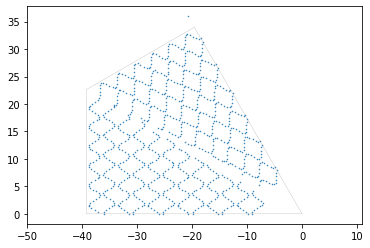

In [24]:
#Scaffold Strand Coordinates

#Coordinates of subunit in iscocelese triangle form
scaffold_coords_initial=[]
for n in range(0,len(helices_lengths)):
    j=n+1
    coords=[]
    
    for k in range(0,helices_lengths[n]):
        i=k+1
        
        x=-h+(0.34*(i-1))
        
        if j%2 ==1:
            a1=(D-2)/2
            b1=((H/2)-j)*D
            theta=((360*(i-1))/10.44)+15
            c1=(1-m.cos(m.radians(theta)))
            
            
            y=a1+b1+c1
            z=-(m.sin(m.radians(theta)))
        else:
            y=(-(D-ddh)/ddh)+((H/2)-j+1)*D -(1-m.cos(m.radians(((360*(i-1))/dhtd)-pc)))
            z=-m.sin(m.radians(((360*(i-1))/dhtd)-15))
        pos=(x,y,z)
        
        scaffold_coords_initial.append(pos)

#applying a transformation to create kite structure

scaffold_coords=[]
for i in range(0, len(scaffold_coords_initial)):
    if i<=int((len(scaffold_coords_initial)/2)):
        point=scaffold_coords_initial[i]
        x=point[0]
        y=point[1]
        z=point[2]
    else:
        point=scaffold_coords_initial[i]
        beta= 360-alpha
        x=(point[0]*m.cos(m.radians(beta)))-(point[1]*m.sin(m.radians(beta)))
        y=(point[0]*m.sin(m.radians(beta)))+(point[1]*m.cos(m.radians(beta)))
        z=point[2]
   
        
        #beta=m.degrees(m.atan(point[1]/point[0]))
        #theta=(180+beta)-(alpha)
        #rad=m.sqrt((point[0])**2+(point[1])**2)
        #x=rad*m.cos(m.radians(theta))
        #y=rad*m.sin(m.radians(theta))
        #z=point[2]
   
    pos=(x,y,z)
    
    scaffold_coords.append(pos)

x_scaf=[]
y_scaf=[]
z_scaf=[]
for i in range(0,len(scaffold_coords)):
    point=scaffold_coords[i]
    x=point[0]
    y=point[1]
    z=point[2]
    
    x_scaf.append(x)
    y_scaf.append(y)
    z_scaf.append(z)

x_scaf    
#kite coords
kite_x=(0,-h,-h,-h*m.cos(m.radians(alpha)),0)
kite_y=(0,0,h*m.tan(m.radians(alpha/2)),h*m.sin(m.radians(alpha)),0)

x_scaf,y_scaf=rotate_origin_only(x_scaf,y_scaf,150)
x_scaf, y_scaf= translate(x_scaf,y_scaf,-2*h*m.cos(m.radians(30)),h)
kite_x,kite_y=rotate_origin_only(kite_x,kite_y,150)
kite_x, kite_y= translate(kite_x,kite_y,-2*h*m.cos(m.radians(30)),h)

#plotting 
plt.plot(x_scaf,y_scaf,".",markersize="1") 
plt.plot(kite_x,kite_y, color="grey", linewidth="0.2")
plt.axis("equal")

(-41.17221257472954, 1.9605815511775824, -1.697913429510922, 35.65618201972889)

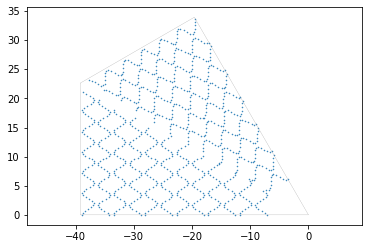

In [25]:
#Staple Strand Coordinates
staple_coords_initial=[]
for n in range(0,len(helices_lengths)):
    j=n+1
    coords=[]
    
    for k in range(0,helices_lengths[n]):
        i=k+1
        
        x=-h+(0.34*(i-1))
        
        if j%2 ==1:
            a1=(D-2)/2
            b1=((H/2)-j)*D
            theta=((360*(i-1))/10.44)+15 +150
            c1=(1-m.cos(m.radians(theta)))
            

            y=a1+b1+c1
            z=-(m.sin(m.radians(theta)))
        else:
            y=(-(D-2)/2)+((H/2)-j+1)*D -(1-m.cos(m.radians(((360*(i-1))/dhtd)-pc-150)))
            z=-m.sin(m.radians(((360*(i-1))/dhtd)-15-150))
        pos=(x,y,z)
        
        staple_coords_initial.append(pos)

#applying a transformation to create Kite 
staple_coords=[]
for i in range(0, len(staple_coords_initial)):
    if i<=int(len(staple_coords_initial)/2)-1:
        point=staple_coords_initial[i]
        x=point[0]
        y=point[1]
        z=point[2]
    else:
        point=staple_coords_initial[i]
        beta= 360-alpha
        x=(point[0]*m.cos(m.radians(beta)))-(point[1]*m.sin(m.radians(beta)))
        y=(point[0]*m.sin(m.radians(beta)))+(point[1]*m.cos(m.radians(beta)))
        z=point[2]
   
        #beta=m.degrees(m.atan(point[1]/point[0]))
        #theta=(180+beta)-(alpha)
        #rad=m.sqrt((point[0])**2+(point[1])**2)
        #x=rad*m.cos(m.radians(theta))
        #y=rad*m.sin(m.radians(theta))
        #z=point[2]
   
    pos=(x,y,z)
    
    staple_coords.append(pos)

x_stap=[]
y_stap=[]
z_stap=[]
for i in range(0,len(staple_coords)):
    point=staple_coords[i]
    x=point[0]
    y=point[1]
    z=point[2]
    
    x_stap.append(x)
    y_stap.append(y)
    z_stap.append(z)

#kite coords
kite_x=(0,-h,-h,-h*m.cos(m.radians(alpha)),0)
kite_y=(0,0,h*m.tan(m.radians(alpha/2)),h*m.sin(m.radians(alpha)),0)

x_stap,y_stap=rotate_origin_only(x_stap,y_stap,150)
x_stap, y_stap= translate(x_stap,y_stap,-2*h*m.cos(m.radians(30)),h)
kite_x,kite_y=rotate_origin_only(kite_x,kite_y,150)
kite_x, kite_y= translate(kite_x,kite_y,-2*h*m.cos(m.radians(30)),h)

#plotting 
plt.plot(x_stap,y_stap,".",markersize="1") 
plt.plot(kite_x,kite_y, color="grey", linewidth="0.2")
plt.axis("equal")

(-41.17221257472954, 1.9605815511775824, -1.798195959453262, 37.76211514851803)

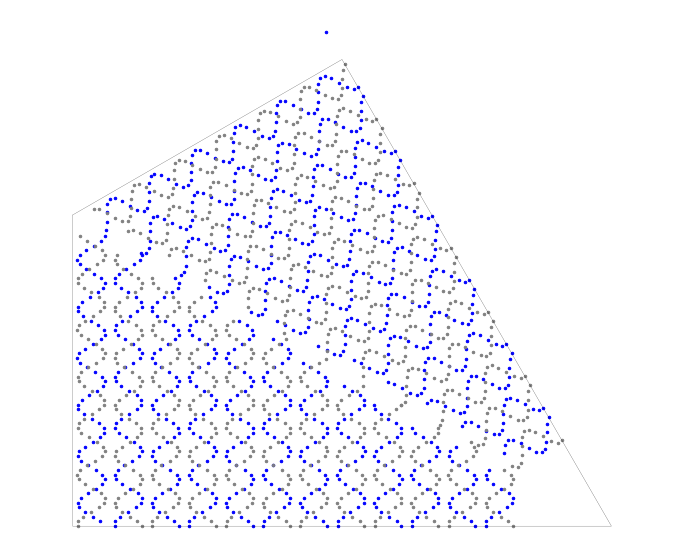

In [26]:
#Subunit with both Scaffold and staple coords 
plt.figure(figsize=[12,10])
plt.plot(x_scaf,y_scaf,".",markersize="5",color="blue") 
plt.plot(x_stap,y_stap,".",markersize="5", color="grey") 
plt.plot(kite_x,kite_y, color="black", linewidth=0.2)
plt.axis("equal")
plt.axis('off')

In [27]:
#Subunit Parameters

#scaffold Loop lengths
#scaffold loops occur between helices 2-3,4-5,6-7,10-11,12-13,14-15 (by design)
#this section is done via design

#finding the indexes in the coordinate list which correpsond to our desired terminal ends 
index=[]
for i in range(1,len(helices_lengths)+1):
    ind=sum(helices_lengths[0:i])-1
    index.append(ind)

scaf_loops_length=[]
x_scaf_loops=[]
y_scaf_loops=[]
for i in range(0,len(index)-1):
    if i%2==1:
        if i != ((len(index)/2)-1): #as two tallest helices have scaffold bridge not loop 
            ind1=index[i]
            ind2=index[i+1]
            #print(ind1,ind2)
            length= m.ceil((m.sqrt((x_scaf[ind1]-x_scaf[ind2])**2+(y_scaf[ind1]-y_scaf[ind2])**2+(z_scaf[ind1]-z_scaf[ind2])**2)/0.4)-1)
            scaf_loops_length.append(length)
            
            #appending coordinates for scaffold loops
            x1=x_scaf[ind1]
            x2=x_scaf[ind2]
            y1=y_scaf[ind1]
            y2=y_scaf[ind2]
            posx=(x1,x2)
            posy=(y1,y2)
            
            x_scaf_loops.append(posx)
            y_scaf_loops.append(posy)
            
print("Length of Scaffold Loops(nt)=",scaf_loops_length)

#scaffold Bridge Length
ind1=index[0]
ind2=index[len(index)-1]
scaf_bridge_length= m.ceil((m.sqrt((x_scaf[ind1]-x_scaf[ind2])**2+(y_scaf[ind1]-y_scaf[ind2])**2+(z_scaf[ind1]-z_scaf[ind2])**2)/0.4)-1)


#appending coordinates for scaffold bridge 
x_scaf_bridge=(x_scaf[ind1],x_scaf[ind2])
y_scaf_bridge=(y_scaf[ind1],y_scaf[ind2])

print("Length of Scaffold Bridge(nt)=",(scaf_bridge_length))

#Staple Bridge lengths for tiles 1,2,5,6,7
#staple bridges Occur between helices 2-15 (1-14),3-14,4-13,5-12,6-11,7-10,8-9
stap_bridge_length_tile_12567=[]
x_stap_bridge=[]
y_stap_bridge=[]
for i in range(0,int(len(index)/2)):
    if i>=1:
        ind1=index[i]
        ind2=index[len(index)-1-i]
        length= m.ceil((m.sqrt((x_stap[ind1]-x_stap[ind2])**2+(y_stap[ind1]-y_stap[ind2])**2+(z_stap[ind1]-z_stap[ind2])**2)/0.4)-1)
        stap_bridge_length_tile_12567.append(length)
        
        #appending coordinates for staple bridges 
        x1=x_stap[ind1]
        x2=x_stap[ind2]
        y1=y_stap[ind1]
        y2=y_stap[ind2]
        posx=(x1,x2)
        posy=(y1,y2)
            
        x_stap_bridge.append(posx)
        y_stap_bridge.append(posy)
        
print("Length of Staple Bridges for subunits 1,2,5,6,7(nt)=",stap_bridge_length_tile_12567)


#Staple Bridge lengths for tiles 3,4,8
#staple bridges Occur between helices 2-15 (1-14),3-14,4-13,5-12,6-11,7-10,8-9
stap_bridge_length_2=[]
x_stap_bridge=[]
y_stap_bridge=[]
for i in range(0,int(len(index)/2)-1):
    if i>=1:
        ind1=index[i]
        ind2=index[len(index)-1-i]
        length= m.ceil((m.sqrt((x_stap[ind1]-x_stap[ind2])**2+(y_stap[ind1]-y_stap[ind2])**2+(z_stap[ind1]-z_stap[ind2])**2)/0.4)-1)
        stap_bridge_length_2.append(length)
        
        #appending coordinates for scaffold loops
        x1=x_stap[ind1]
        x2=x_stap[ind2]
        y1=y_stap[ind1]
        y2=y_stap[ind2]
        posx=(x1,x2)
        posy=(y1,y2)
            
        x_stap_bridge.append(posx)
        y_stap_bridge.append(posy)

#staple loops length
length1= m.ceil((m.sqrt((x_scaf[index[1]]-x_scaf[index[0]])**2+(y_scaf[index[1]]-y_scaf[index[0]])**2+(z_scaf[index[1]]-z_scaf[index[0]])**2)/0.4)-1)
length2= m.ceil((m.sqrt((x_scaf[index[len(index)-1]]-x_scaf[index[(len(index)-2)]])**2+(y_scaf[index[len(index)-1]]-y_scaf[index[len(index)-2]])**2+(z_scaf[index[len(index)-1]]-z_scaf[index[len(index)-2]])**2)/0.4)-1)

staple_loops_length=[length1,length2]


print("Length of Staple Bridges for subunits 3,4,8(nt)=",stap_bridge_length_2[0: int(len(stap_bridge_length_2)-1)])
print("Length of Staple loops for subunits 3,4,8(nt)=",staple_loops_length)


Length of Scaffold Loops(nt)= [8, 7, 9, 9, 8, 7, 8, 7, 6, 8]
Length of Scaffold Bridge(nt)= 4
Length of Staple Bridges for subunits 1,2,5,6,7(nt)= [1, 1, 1, 1, 1, 1, 3, 3, 5, 4, 5]
Length of Staple Bridges for subunits 3,4,8(nt)= [1, 1, 1, 1, 1, 1, 3, 3, 5]
Length of Staple loops for subunits 3,4,8(nt)= [9, 8]


(-42.95613796699306, 110.87267514742906, -46.60270516475668, 65.05055776338814)

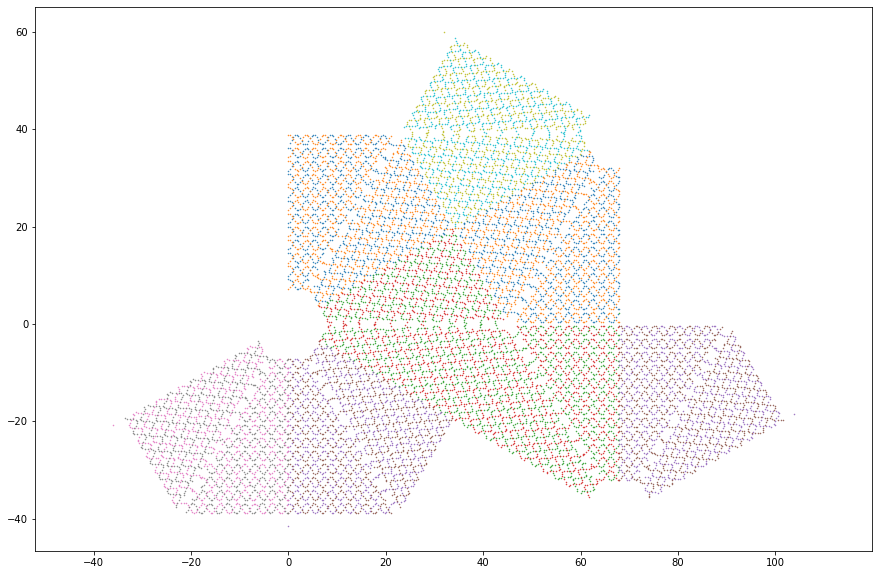

In [28]:
#appending subunits into kites format to caluclated bridges
x_sub_1, y_sub_1 = rotate_origin_only(x_scaf,y_scaf,90)
x_stap_1, y_stap_1 = rotate_origin_only(x_stap,y_stap,90)

x_sub_2, y_sub_2 = rotate_origin_only(x_scaf,y_scaf,150)
x_stap_2, y_stap_2 = rotate_origin_only(x_stap,y_stap,150)

x_sub_3, y_sub_3 = rotate_origin_only(x_scaf,y_scaf,210)
x_stap_3, y_stap_3 = rotate_origin_only(x_stap,y_stap,210)

x_sub_4, y_sub_4 = rotate_origin_only(x_scaf,y_scaf,270)
x_stap_4, y_stap_4 = rotate_origin_only(x_stap,y_stap,270)


x_sub_5, y_sub_5 = rotate_origin_only(x_scaf,y_scaf,-30)
x_sub_5, y_sub_5= translate(x_sub_5,y_sub_5,2*h2*m.cos(m.radians(30)),h2)
x_stap_5, y_stap_5 = rotate_origin_only(x_stap,y_stap,-30)
x_stap_5, y_stap_5= translate(x_stap_5,y_stap_5,2*h2*m.cos(m.radians(30)),h2)

x_sub_6, y_sub_6 = rotate_origin_only(x_scaf,y_scaf,270)
x_sub_6, y_sub_6= translate(x_sub_6,y_sub_6,2*h2*m.cos(m.radians(30)),h2)
x_stap_6, y_stap_6 = rotate_origin_only(x_stap,y_stap,270)
x_stap_6, y_stap_6= translate(x_stap_6,y_stap_6,2*h2*m.cos(m.radians(30)),h2)


x_sub_7, y_sub_7 = rotate_origin_only(x_scaf,y_scaf,30)
x_sub_7, y_sub_7= translate(x_sub_7,y_sub_7,2*h2*m.cos(m.radians(30)),-h2)
x_stap_7, y_stap_7 = rotate_origin_only(x_stap,y_stap,30)
x_stap_7, y_stap_7= translate(x_stap_7,y_stap_7,2*h2*m.cos(m.radians(30)),-h2)

x_sub_8, y_sub_8 = rotate_origin_only(x_scaf,y_scaf,90)
x_sub_8, y_sub_8= translate(x_sub_8,y_sub_8,2*h2*m.cos(m.radians(30)),-h2)
x_stap_8, y_stap_8 = rotate_origin_only(x_stap,y_stap,90)
x_stap_8, y_stap_8= translate(x_stap_8,y_stap_8,2*h2*m.cos(m.radians(30)),-h2)



plt.figure(figsize=[15,10])
plt.plot(x_sub_1,y_sub_1,".",markersize="1")
plt.plot(x_stap_1,y_stap_1,".",markersize="1")

plt.plot(x_sub_2,y_sub_2,".",markersize="1")
plt.plot(x_stap_2,y_stap_2,".",markersize="1")

plt.plot(x_sub_3,y_sub_3,".",markersize="1")
plt.plot(x_stap_3,y_stap_3,".",markersize="1")

plt.plot(x_sub_4,y_sub_4,".",markersize="1")
plt.plot(x_stap_4,y_stap_4,".",markersize="1")

plt.plot(x_sub_5,y_sub_5,".",markersize="1")
plt.plot(x_stap_5,y_stap_5,".",markersize="1")

plt.plot(x_sub_6,y_sub_6,".",markersize="1")
plt.plot(x_stap_6,y_stap_6,".",markersize="1")

plt.plot(x_sub_7,y_sub_7,".",markersize="1")
plt.plot(x_stap_7,y_stap_7,".",markersize="1")

plt.plot(x_sub_8,y_sub_8,".",markersize="1")
plt.plot(x_stap_8,y_stap_8,".",markersize="1")

plt.axis("equal")


In [29]:
#lengths between Scaffold Bridges between subunits
#by construction we need additional scaffold brides between subunits 1-2,2-3,3-4,4-1,7-8,7-8
int1=int(len(index)/2)
int2=int(len(index)/2)-1

length1=m.ceil((m.sqrt((x_sub_1[index[int1]]-x_sub_5[index[int2]])**2+(y_sub_1[index[int1]]-y_sub_5[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length2=m.ceil((m.sqrt((x_sub_5[index[int1]]-x_sub_1[index[int2]])**2+(y_sub_5[index[int1]]-y_sub_1[index[int2]])**2+(z_stap[index[int2]]-z_stap[index[int1]])**2)/0.4)-1)
length3=m.ceil((m.sqrt((x_sub_2[index[int1]]-x_sub_6[index[int2]])**2+(y_sub_2[index[int1]]-y_sub_6[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length4=m.ceil((m.sqrt((x_sub_6[index[int1]]-x_sub_7[index[int2]])**2+(y_sub_6[index[int1]]-y_sub_7[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length5=m.ceil((m.sqrt((x_sub_7[index[int1]]-x_sub_2[index[int2]])**2+(y_sub_7[index[int1]]-y_sub_2[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length6=m.ceil((m.sqrt((x_sub_3[index[int1]]-x_sub_3[index[int2]])**2+(y_sub_3[index[int1]]-y_sub_3[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length7=m.ceil((m.sqrt((x_sub_4[index[int1]]-x_sub_4[index[int2]])**2+(y_sub_4[index[int1]]-y_sub_4[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length8=m.ceil((m.sqrt((x_sub_8[index[int1]]-x_sub_8[index[int2]])**2+(y_sub_8[index[int1]]-y_sub_8[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)


subunit_scaffold_bridge_lengths=[length1,length2,length3,length4,length5,length6,length7,length8]

print("Length of scaffold Bridges between subunits=",subunit_scaffold_bridge_lengths)


Length of scaffold Bridges between subunits= [12, 11, 11, 11, 11, 1, 1, 1]


In [30]:
#Total length of scaffold Bridge
length_subunit=len(x_sub_1)
length_all_sub=8*length_subunit
length_scaf_loops_subunit=sum(scaf_loops_length)
length_all_scaf_loops=8*length_scaf_loops_subunit
length_scaf_bridge_subunit=scaf_bridge_length+1 #+1 for M13mp18 
length_all_scaf_bridge=8*length_scaf_bridge_subunit +sum(subunit_scaffold_bridge_lengths)+4 #+3 for M13mp18 

total_length_scaf=length_all_sub+length_all_scaf_loops+length_all_scaf_bridge
print("Total Scaffold Length=",total_length_scaf,"nt")

Total Scaffold Length= 8063 nt


IndexError: list index out of range

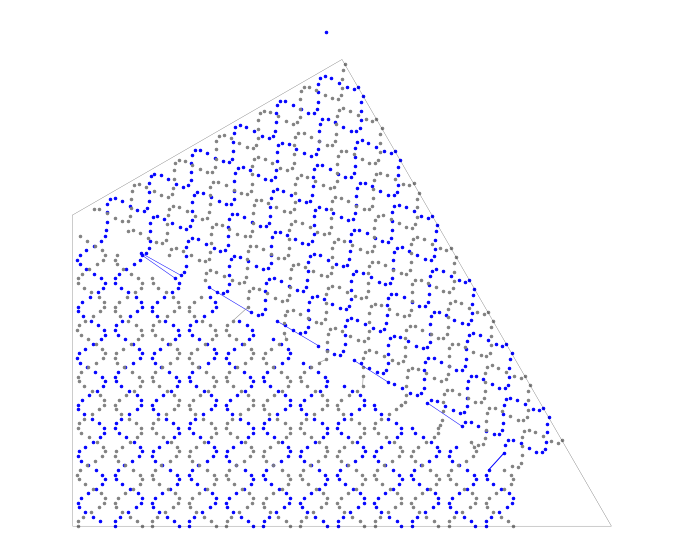

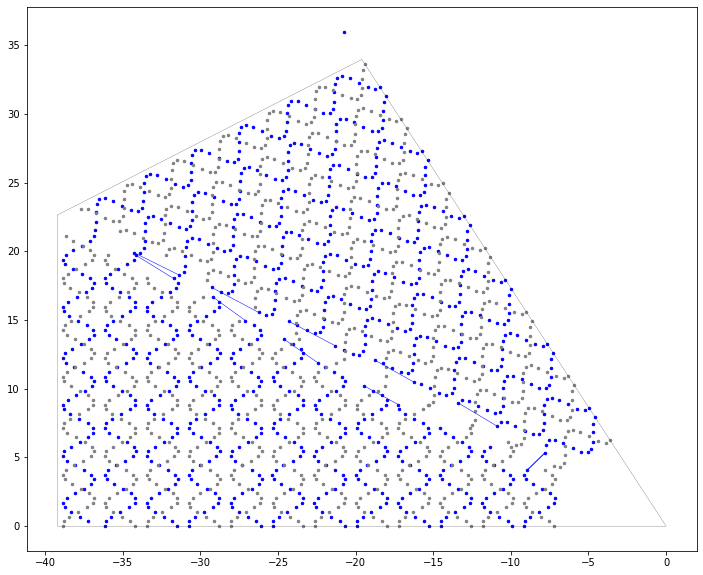

In [31]:
#diagram of Subunit
plt.figure(figsize=[12,10])
plt.plot(x_scaf,y_scaf,".",markersize="5",color="blue") 
plt.plot(x_stap,y_stap,".",markersize="5", color="grey") 
plt.plot(kite_x,kite_y, color="black", linewidth=0.2)

#plotting loops and bridges
#scaffold Bridge
plt.plot(x_scaf_bridge,y_scaf_bridge,"-",color="blue", linewidth="1")

#scaffold Loops
plt.plot(x_scaf_loops[0],y_scaf_loops[0],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[1],y_scaf_loops[1],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[2],y_scaf_loops[2],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[3],y_scaf_loops[3],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[4],y_scaf_loops[4],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[5],y_scaf_loops[5],"-", color="blue",linewidth="0.5")

#Staple_bridge
plt.plot(x_stap_bridge[0],y_stap_bridge[0],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[1],y_stap_bridge[1],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[2],y_stap_bridge[2],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[3],y_stap_bridge[3],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[4],y_stap_bridge[4],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[5],y_stap_bridge[5],"-", color="grey",linewidth="0.5")
plt.plot(x_stap_bridge[6],y_stap_bridge[6],"-", color="grey",linewidth="0.5")
plt.axis("equal")
plt.axis('off')

#diagram of Subunit
plt.figure(figsize=[12,10])
plt.plot(x_scaf,y_scaf,".",markersize="5",color="blue") 
plt.plot(x_stap,y_stap,".",markersize="5", color="grey") 
plt.plot(kite_x,kite_y, color="black", linewidth=0.2)

#plotting loops and bridges
#scaffold Bridge
plt.plot(x_scaf_bridge,y_scaf_bridge,"-",color="blue", linewidth="1")

#scaffold Loops
plt.plot(x_scaf_loops[0],y_scaf_loops[0],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[1],y_scaf_loops[1],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[2],y_scaf_loops[2],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[3],y_scaf_loops[3],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[4],y_scaf_loops[4],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[5],y_scaf_loops[5],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[6],y_scaf_loops[6],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[7],y_scaf_loops[7],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[8],y_scaf_loops[8],"-", color="blue",linewidth="0.5")
plt.plot(x_scaf_loops[10],y_scaf_loops[10],"-", color="blue",linewidth="0.5")


#Staple_bridge
#plt.plot(x_stap_bridge[0],y_stap_bridge[0],"-", color="grey",linewidth="0.5")
#plt.plot(x_stap_bridge[1],y_stap_bridge[1],"-", color="grey",linewidth="0.5")
#plt.plot(x_stap_bridge[2],y_stap_bridge[2],"-", color="grey",linewidth="0.5")
#plt.plot(x_stap_bridge[3],y_stap_bridge[3],"-", color="grey",linewidth="0.5")
#plt.plot(x_stap_bridge[4],y_stap_bridge[4],"-", color="grey",linewidth="0.5")
#plt.plot(x_stap_bridge[5],y_stap_bridge[5],"-", color="grey",linewidth="0.5")
#plt.plot(x_stap_bridge[6],y_stap_bridge[6],"-", color="grey",linewidth="0.5")

#staple Bridges
plt.plot(((x_stap_bridge[5])[0],(x_stap_bridge[6])[0]),((y_stap_bridge[5])[0],(y_stap_bridge[6])[0]),"-", color="grey",linewidth="0.5")
plt.plot(((x_stap_bridge[5])[1],(x_stap_bridge[6])[1]),((y_stap_bridge[5])[1],(y_stap_bridge[6])[1]),"-", color="grey",linewidth="0.5")
#plt.plot(x_stap_bridge[6],y_stap_bridge[6],"-", color="grey",linewidth="0.5")

plt.axis("equal")
plt.axis('off')

In [ ]:
x_sub_1, y_sub_1 = rotate_origin_only(x_scaf,y_scaf,90)
x_stap_1, y_stap_1 = rotate_origin_only(x_stap,y_stap,90)

x_sub_2, y_sub_2 = rotate_origin_only(x_scaf,y_scaf,150)
x_stap_2, y_stap_2 = rotate_origin_only(x_stap,y_stap,150)

x_sub_3, y_sub_3 = rotate_origin_only(x_scaf,y_scaf,210)
x_stap_3, y_stap_3 = rotate_origin_only(x_stap,y_stap,210)

x_sub_4, y_sub_4 = rotate_origin_only(x_scaf,y_scaf,270)
x_stap_4, y_stap_4 = rotate_origin_only(x_stap,y_stap,270)


x_sub_5, y_sub_5 = rotate_origin_only(x_scaf,y_scaf,-30)
x_sub_5, y_sub_5= translate(x_sub_5,y_sub_5,2*h2*m.cos(m.radians(30))+0.5,h2+0.5)
x_stap_5, y_stap_5 = rotate_origin_only(x_stap,y_stap,-30)
x_stap_5, y_stap_5= translate(x_stap_5,y_stap_5,2*h2*m.cos(m.radians(30))+0.5,h2+0.5)

x_sub_6, y_sub_6 = rotate_origin_only(x_scaf,y_scaf,270)
x_sub_6, y_sub_6= translate(x_sub_6,y_sub_6,2*h2*m.cos(m.radians(30))+0.5,h2+0.5)
x_stap_6, y_stap_6 = rotate_origin_only(x_stap,y_stap,270)
x_stap_6, y_stap_6= translate(x_stap_6,y_stap_6,2*h2*m.cos(m.radians(30))+0.5,h2+0.5)


x_sub_7, y_sub_7 = rotate_origin_only(x_scaf,y_scaf,30)
x_sub_7, y_sub_7= translate(x_sub_7,y_sub_7,2*h2*m.cos(m.radians(30))+0.5,-h2-0.5)
x_stap_7, y_stap_7 = rotate_origin_only(x_stap,y_stap,30)
x_stap_7, y_stap_7= translate(x_stap_7,y_stap_7,2*h2*m.cos(m.radians(30))+0.5,-h2-0.5)

x_sub_8, y_sub_8 = rotate_origin_only(x_scaf,y_scaf,90)
x_sub_8, y_sub_8= translate(x_sub_8,y_sub_8,2*h2*m.cos(m.radians(30))+0.5,-h2-0.5)
x_stap_8, y_stap_8 = rotate_origin_only(x_stap,y_stap,90)
x_stap_8, y_stap_8= translate(x_stap_8,y_stap_8,2*h2*m.cos(m.radians(30))+0.5,-h2-0.5)


plt.figure(figsize=[15,10])
plt.plot(x_sub_1,y_sub_1,".",markersize="1")
#plt.plot(x_stap_1,y_stap_1,".",markersize="1")

plt.plot(x_sub_2,y_sub_2,".",markersize="1")
#plt.plot(x_stap_2,y_stap_2,".",markersize="1")

plt.plot(x_sub_3,y_sub_3,".",markersize="1")
#plt.plot(x_stap_3,y_stap_3,".",markersize="1")

plt.plot(x_sub_4,y_sub_4,".",markersize="1")
#plt.plot(x_stap_4,y_stap_4,".",markersize="1")

plt.plot(x_sub_5,y_sub_5,".",markersize="1")
#plt.plot(x_stap_5,y_stap_5,".",markersize="1")

plt.plot(x_sub_6,y_sub_6,".",markersize="1")
#plt.plot(x_stap_6,y_stap_6,".",markersize="1")

plt.plot(x_sub_7,y_sub_7,".",markersize="1")
#plt.plot(x_stap_7,y_stap_7,".",markersize="1")

plt.plot(x_sub_8,y_sub_8,".",markersize="1")
#plt.plot(x_stap_8,y_stap_8,".",markersize="1")

plt.plot((x_sub_1[index[int1]]),(y_sub_1[index[int1]]),"x")
plt.plot((x_sub_2[index[8]],x_sub_6[index[7]]),(y_sub_2[index[8]],y_sub_6[index[7]]),"x")
plt.plot((x_sub_6[index[8]],x_sub_7[index[7]]),(y_sub_6[index[8]],y_sub_7[index[7]]),"x")
plt.plot((x_sub_2[index[7]],x_sub_7[index[8]]),(y_sub_2[index[7]],y_sub_7[index[8]]),"x")
plt.plot((x_sub_3[index[7]],x_sub_3[index[8]]),(y_sub_3[index[7]],y_sub_3[index[8]]),"x")
plt.plot((x_sub_4[index[7]],x_sub_4[index[8]]),(y_sub_4[index[7]],y_sub_4[index[8]]),"x")

print(int(len(index)/2))

plt.plot(x_sub_1[index[int(len(index)/2)-1]],y_sub_1[index[int(len(index)/2)-1]],"x",color="black")
plt.plot(x_sub_5[index[int(len(index)/2)]],y_sub_5[index[int(len(index)/2)]],"x",color="black")
plt.axis("equal")


In [32]:
#lengths between Scaffold Bridges between subunits
#by construction we need additional scaffold brides between subunits 1-2,2-3,3-4,4-1,7-8,7-8
int1=int(len(index)/2)
int2=int(len(index)/2)-1

length1=m.ceil((m.sqrt((x_sub_1[index[int1]]-x_sub_5[index[int2]])**2+(y_sub_1[index[int1]]-y_sub_5[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length2=m.ceil((m.sqrt((x_sub_5[index[int1]]-x_sub_1[index[int2]])**2+(y_sub_5[index[int1]]-y_sub_1[index[int2]])**2+(z_stap[index[int2]]-z_stap[index[int1]])**2)/0.4)-1)
length3=m.ceil((m.sqrt((x_sub_2[index[int1]]-x_sub_6[index[int2]])**2+(y_sub_2[index[int1]]-y_sub_6[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length4=m.ceil((m.sqrt((x_sub_6[index[int1]]-x_sub_7[index[int2]])**2+(y_sub_6[index[int1]]-y_sub_7[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length5=m.ceil((m.sqrt((x_sub_7[index[int1]]-x_sub_2[index[int2]])**2+(y_sub_7[index[int1]]-y_sub_2[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length6=m.ceil((m.sqrt((x_sub_3[index[int1]]-x_sub_3[index[int2]])**2+(y_sub_3[index[int1]]-y_sub_3[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length7=m.ceil((m.sqrt((x_sub_4[index[int1]]-x_sub_4[index[int2]])**2+(y_sub_4[index[int1]]-y_sub_4[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)
length8=m.ceil((m.sqrt((x_sub_8[index[int1]]-x_sub_8[index[int2]])**2+(y_sub_8[index[int1]]-y_sub_8[index[int2]])**2+(z_stap[index[int1]]-z_stap[index[int2]])**2)/0.4)-1)


subunit_scaffold_bridge_lengths=[length1,length2,length3,length4,length5,length6,length7,length8]

print("Length of scaffold Bridges between subunits=",subunit_scaffold_bridge_lengths)


Length of scaffold Bridges between subunits= [12, 11, 11, 11, 11, 1, 1, 1]


In [33]:
#Total length of scaffold Bridge
length_subunit=len(x_scaf)
length_all_sub=8*length_subunit
length_scaf_loops_subunit=sum(scaf_loops_length)
length_all_scaf_loops=8*length_scaf_loops_subunit
length_scaf_bridge_subunit=scaf_bridge_length
length_all_scaf_bridge=10*length_scaf_bridge_subunit +sum(subunit_scaffold_bridge_lengths)


total_length_scaf=length_all_sub+length_all_scaf_loops+length_all_scaf_bridge
print(total_length_scaf)
#diff=(7249-total_length_scaf)f
#print(diff)

8059


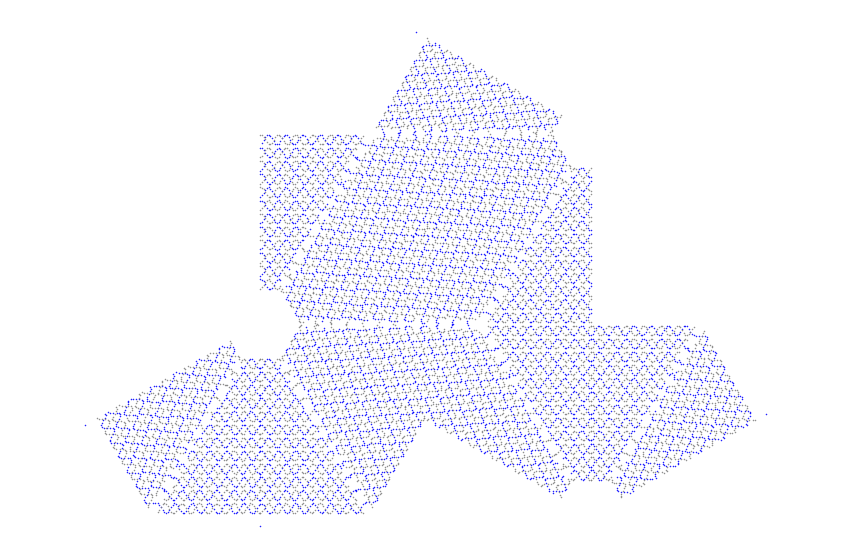

In [34]:
plt.figure(figsize=[15,10])
plt.plot(x_sub_1,y_sub_1,".",markersize="1",color="blue")
plt.plot(x_stap_1,y_stap_1,".",markersize="1",color="grey")

plt.plot(x_sub_2,y_sub_2,".",markersize="1",color="blue")
plt.plot(x_stap_2,y_stap_2,".",markersize="1",color="grey")

plt.plot(x_sub_3,y_sub_3,".",markersize="1",color="blue")
plt.plot(x_stap_3,y_stap_3,".",markersize="1",color="grey")

plt.plot(x_sub_4,y_sub_4,".",markersize="1",color="blue")
plt.plot(x_stap_4,y_stap_4,".",markersize="1",color="grey")

plt.plot(x_sub_5,y_sub_5,".",markersize="1",color="blue")
plt.plot(x_stap_5,y_stap_5,".",markersize="1",color="grey")

plt.plot(x_sub_6,y_sub_6,".",markersize="1",color="blue")
plt.plot(x_stap_6,y_stap_6,".",markersize="1",color="grey")

plt.plot(x_sub_7,y_sub_7,".",markersize="1",color="blue")
plt.plot(x_stap_7,y_stap_7,".",markersize="1",color="grey")

plt.plot(x_sub_8,y_sub_8,".",markersize="1",color="blue")
plt.plot(x_stap_8,y_stap_8,".",markersize="1",color="grey")

#plt.plot((x_sub_1[index[int1]],x_sub_5[index[int2]]),(y_sub_1[index[int1]],y_sub_5[index[int2]]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_5[index[int1]],x_sub_1[index[int2]]),(y_sub_5[index[int1]],y_sub_1[index[int2]]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_2[index[int1]],x_sub_7[index[int2]]),(y_sub_2[index[int1]],y_sub_7[index[int2]]),"-", color="blue",linewidth="0.5")

#plt.plot((x_sub_6[index[int1]],x_sub_7[index[int2]]),(y_sub_6[index[int1]],y_sub_7[index[int2]]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_6[index[int1]],x_sub_2[index[int2]]),(y_sub_6[index[int1]],y_sub_2[index[int2]]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_3[index[int1]],x_sub_3[index[int2]]),(y_sub_3[index[int1]],y_sub_3[index[int2]]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_4[index[int1]],x_sub_4[index[int2]]),(y_sub_4[index[int1]],y_sub_4[index[int2]]),"-", color="blue",linewidth="0.5")
#plt.plot((x_sub_8[index[int1]],x_sub_8[index[int2]]),(y_sub_8[index[int1]],y_sub_8[index[int2]]),"-", color="blue",linewidth="0.5")


plt.axis("equal")
plt.axis("off")
dir_name= "/Users/ali/Documents/USyd/Honours/Figures/Diagrams/"
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(dir_name))
plt.savefig("Long edge for edit",dpi=300, bbox_inches='tight')



